In [1]:
library(ggplot2)
#library(R.matlab)
library(reshape2)
library(ggpubr)
library(dplyr)
library(weights)
library(ppcor)
library(survey)
library(ggpubr)
library(ggExtra)
library(car)
library(multcomp)
library(cowplot)
#options(jupyter.plot_mimetypes = c("text/plain", "image/png"))
#options(repr.plot.width = 1, repr.plot.height = 0.75) #, repr.plot.res = 1000)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'reshape2' was built under R version 3.6.3"
Warning message:
"package 'ggpubr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: Hmisc

Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 3.6.3"
Loading required package: survival

Warning message:
"package 'survival' was built under R version 3.6.3"
Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: gdata

Warning message:
"package '

In [2]:
data <- read.table('../data/R_data2.csv', sep=',', header=TRUE)

In [3]:
head(data)

,X.3,Unnamed..0,ID,MMSE,VLMTDG7,NA.,X.2,X.1,X,NeuroMET_num,⋯,GSH_CRLBp,Age,mrs_to_voxel_thr03_masked_gm,GSH_CRLBa,GSH_inv_CRLBa2_norm,diagnosis,Seed.to.Voxel,n,NeuroMET_MS,NeuroMET_MS_SSE
,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
1,0,1,NeuroMET2-091,29,15,91,78,78,77,91,⋯,0.08529438,71,0.5072099,0.10393046,0.010439241,SCD,0.5175934,su,1.167,0.712
2,1,2,NeuroMET2-092,NA,NA,92,79,79,78,92,⋯,0.08551280,65,0.5149734,0.14624880,0.005271934,SCD,0.5233871,su,-0.643,0.766
3,2,3,NeuroMET2-093,30,13,93,80,80,79,93,⋯,0.07604469,59,0.5463947,0.09637991,0.012138963,SCD,0.5554736,su,1.270,0.746
4,3,4,NeuroMET2-094,NA,NA,94,81,81,80,94,⋯,0.08733261,60,0.5241774,0.10895693,0.009498277,SCD,0.5373630,su,1.270,0.746
5,4,5,NeuroMET2-095,13,0,95,82,82,81,95,⋯,0.09785698,78,0.5616193,0.07979991,0.017707198,AD,0.5704255,su,-2.849,1.104
6,5,6,NeuroMET2-096,NA,NA,96,83,83,82,96,⋯,0.09090515,75,0.5863045,0.13772910,0.005944333,MCI,0.6034846,su,-0.253,0.820


In [4]:
colnames(data)

[1] "X.3"                          "Unnamed..0"                  
 [3] "ID"                           "MMSE"                        
 [5] "VLMTDG7"                      "NA."                         
 [7] "X.2"                          "X.1"                         
 [9] "X"                            "NeuroMET_num"                
[11] "ID_l"                         "diag"                        
[13] "QC"                           "pcc_dmn_sph"                 
[15] "pcc_pcc_sph"                  "pcc_mpfc_sph"                
[17] "pcc_lipl_sph"                 "pcc_ripl_sph"                
[19] "mpfc_mpfc_sph"                "mpfc_lipl_sph"               
[21] "mpfc_ripl_sph"                "lipl_lipl_sph"               
[23] "lipl_ripl_sph"                "ripl_ripl_sph"               
[25] "CONN_ID"                      "GSH"                         
[27] "GSH_CRLBp"                    "Age"                         
[29] "mrs_to_voxel_thr03_masked_gm" "GSH_CRLBa"                   
[31] "GSH_inv_CRLBa2_norm"          "diagnosis"                   
[33] "Seed.to.Voxel"                "n"                           
[35] "NeuroMET_MS"                  "NeuroMET_MS_SSE"

In [5]:
dim(data)

[1] 95 36

In [6]:
# Two participants were excluded for medical reasions. We drop them
data <- subset(data, !is.na(diagnosis))

In [7]:
dim(data)

[1] 95 36

In [8]:
# We want to plot the diagnosis in the boxplots in the following order

In [9]:
diag_order <- c('HC', 'SCD', 'MCI', 'AD')

In [113]:
# we have to factorize the diagnosis for the tests
diag <- data['diag']
data['diag_fact'] <- factor(diag[!is.na(diag)])

ERROR: Error in `[<-.data.frame`(`*tmp*`, "diag_fact", value = structure(c(2L, : replacement has 93 rows, data has 95


In [10]:
data_w <- subset(data, !is.na(GSH_CRLBa))

In [11]:
data_w['int_GSH_CRLBa2'] <- 1/data_w['GSH_CRLBa']^2

In [12]:
w_mean <- mean(data_w$int_GSH_CRLBa2)
w_mean

[1] 95.35917

In [13]:
w_max <- max(data_w$int_GSH_CRLBa2)
w_min <- min(data_w$int_GSH_CRLBa2)

In [14]:
w_max

[1] 1205.633

In [15]:
w_min

[1] 7.416426

In [16]:
data_w['w_norm'] <- (data_w['int_GSH_CRLBa2'] - w_mean)/(w_max-w_min)+1

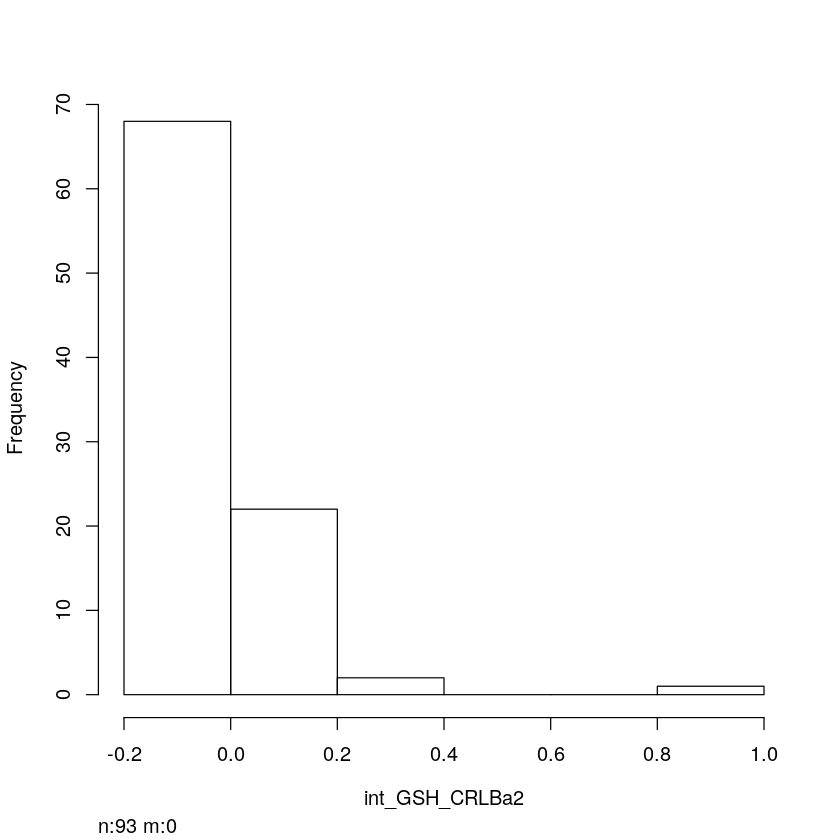

In [17]:
hist((data_w['int_GSH_CRLBa2'] - w_mean)/(w_max-w_min))

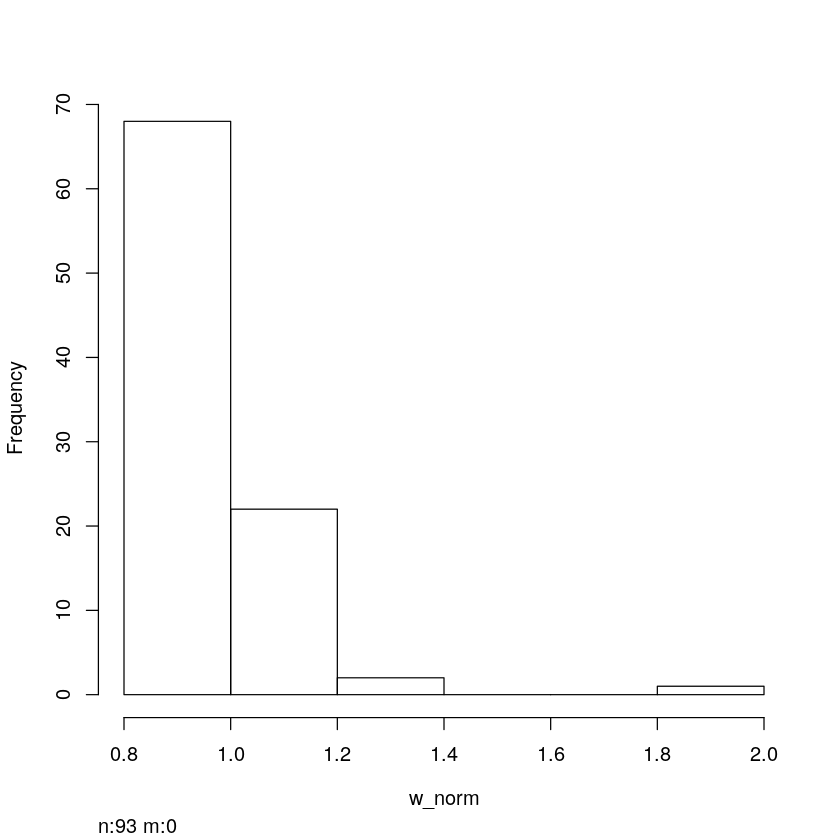

In [18]:
hist(data_w['w_norm'])

In [19]:
mean(data_w$w_norm)

[1] 1

In [20]:
sum(data_w$w_norm)

[1] 93

In [21]:
data <- data_w

## MRS Data

In [22]:
data_gsh <- subset(data, !is.na(GSH))
data_gsh <- subset(data, !is.na(diag))

In [23]:
# we have to factorize the diagnosis for the tests
diag <- data_gsh['diag']
data_gsh['diag_fact'] <- factor(diag[!is.na(diag)])

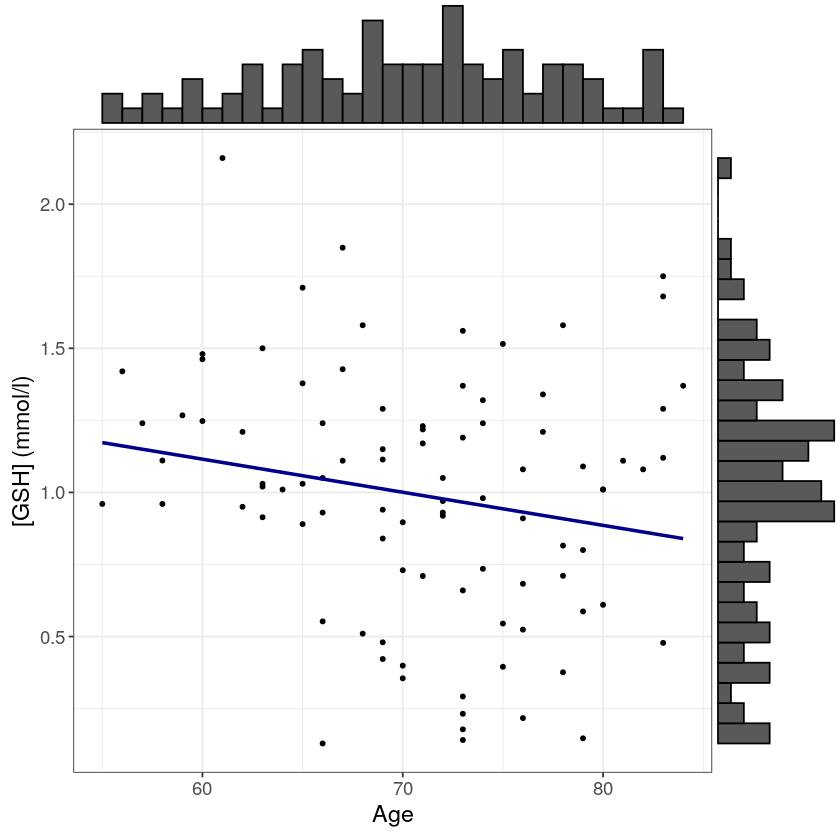

In [24]:
p<- ggplot(data_gsh, aes(y=GSH, x=Age)) + 
  geom_point(size=1) +
theme_bw() +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  ylab('[GSH] (mmol/l)') +
  xlab('Age') +
#  labs(title = "GSH concentration vs FC PCC to whole DMN") +
  theme(text = element_text(size=14)) +
  geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkblue')
p <- ggMarginal(p, type = "histogram")
p

Warning message:
"Removed 3 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 3 rows containing missing values (geom_point)."


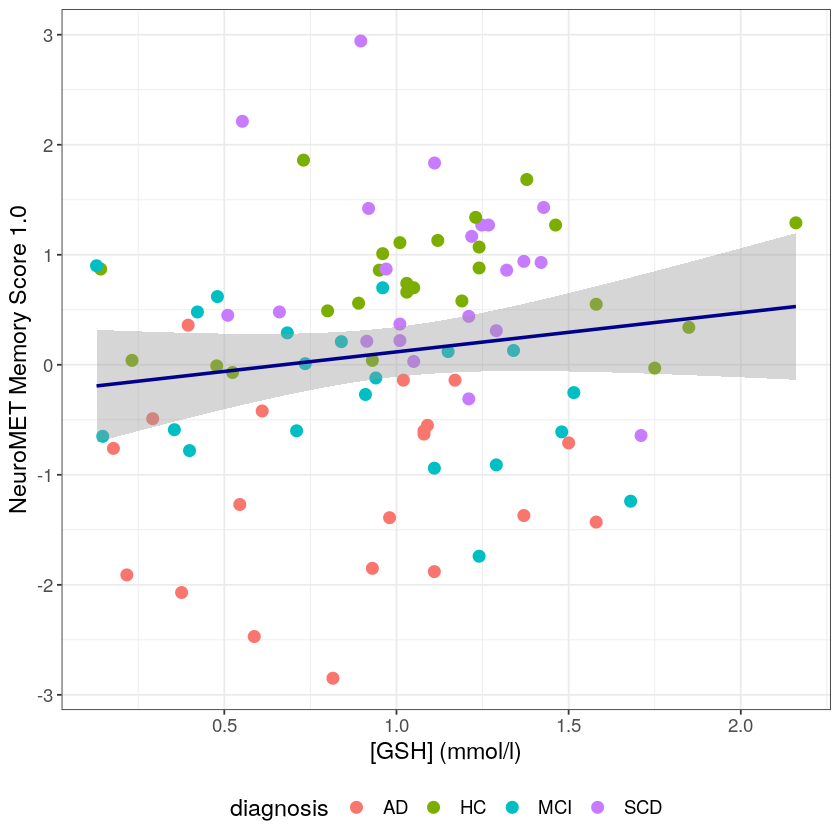

In [25]:
p<- ggplot(data_gsh, aes(x=GSH, y=NeuroMET_MS)) + 
  geom_point(aes(color = diagnosis), size=3) +
theme_bw() +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "bottom") +
  xlab('[GSH] (mmol/l)') +
  ylab('NeuroMET Memory Score 1.0') +
#  labs(title = "GSH concentration vs FC PCC to whole DMN") +
  theme(text = element_text(size=14)) +
  geom_smooth(method="lm", formula = 'y ~ x', fullrange=TRUE, color='darkblue')
#p <- ggMarginal(p, type = "histogram")
p

In [28]:
m1 <- lm(NeuroMET_MS~GSH+Age, weights=w_norm, data=data_gsh)
summary(m1)


Call:
lm(formula = NeuroMET_MS ~ GSH + Age, data = data_gsh, weights = w_norm)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-2.60230 -0.44780  0.09305  0.60422  2.84248 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.15334    1.15940   3.582 0.000567 ***
GSH          0.13319    0.25618   0.520 0.604467    
Age         -0.05863    0.01527  -3.838 0.000238 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9975 on 85 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1611,	Adjusted R-squared:  0.1414 
F-statistic: 8.163 on 2 and 85 DF,  p-value: 0.0005717


In [29]:
confint(m1)

,2.5 %,97.5 %
(Intercept),1.84814580,6.45853978
GSH,-0.37615945,0.64254823
Age,-0.08900073,-0.02825973


Warning message:
"Removed 3 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 3 rows containing missing values (geom_point)."


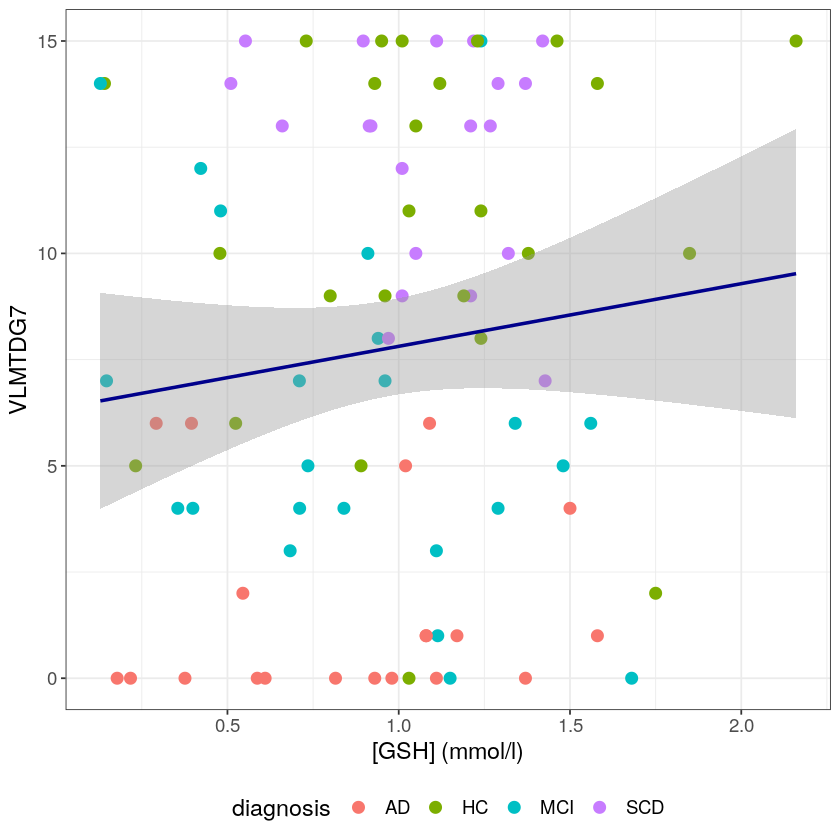

In [147]:
p<- ggplot(data_gsh, aes(x=GSH, y=VLMTDG7)) + 
  geom_point(aes(color = diagnosis), size=3) +
theme_bw() +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "bottom") +
  xlab('[GSH] (mmol/l)') +
  ylab('VLMTDG7') +
#  labs(title = "GSH concentration vs FC PCC to whole DMN") +
  theme(text = element_text(size=14)) +
  geom_smooth(method="lm", formula = 'y ~ x', fullrange=TRUE, color='darkblue')
#p <- ggMarginal(p, type = "histogram")
p

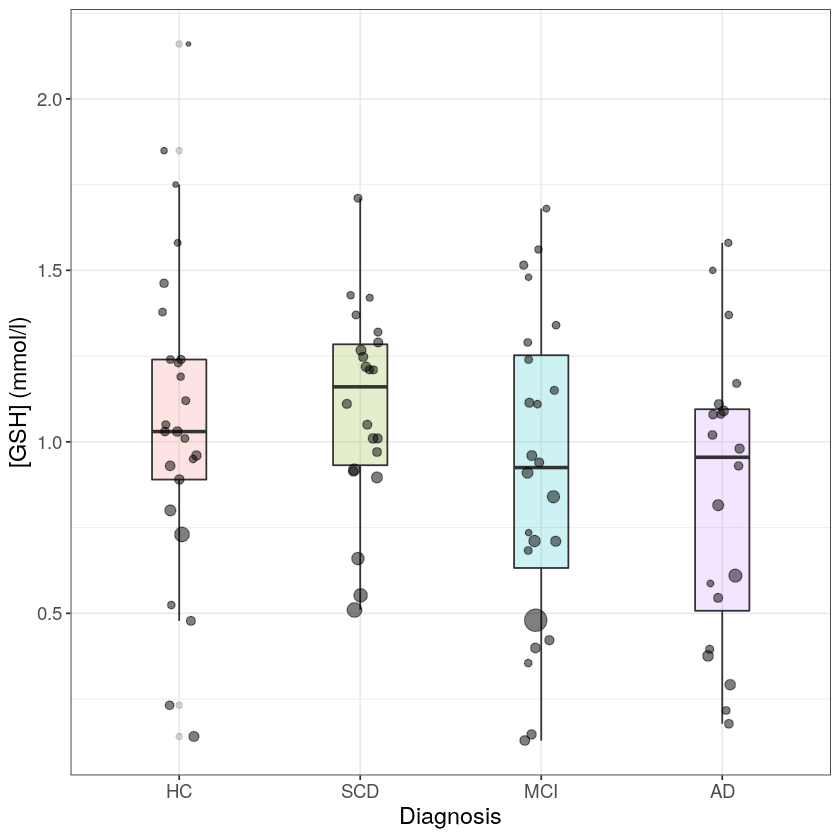

In [148]:
#GHS vs concentration
gsh_vs_diag <- ggplot(data_gsh %>% mutate(diag=factor(diagnosis, levels=diag_order)),
                      aes(x=diag, y=GSH)) +
    geom_boxplot(alpha = 0.2, width = 0.3, aes(fill=factor(diag)), show.legend=FALSE) +
    theme(legend.position='none')+
    xlab('Diagnosis') +
    ylab('[GSH] (mmol/l)') +
    theme(strip.text.x = element_text(size=9, color="black", face="bold")) +
#     stat_compare_means(method = "anova", 
#                        position = "identity",
#                        label.x.npc = "center",
#                        label.y.npc = "bottom",
#                        label = "p.format",
#                        size = 5) +
#stat_summary(fun.y=mean, geom="point", shape=10, size=7, color="red", fill="red") +
theme_bw() +
theme(text = element_text(size=14)) +
geom_jitter(aes(size=w_norm), position=position_jitter(width=0.1), alpha=0.5,show.legend = FALSE)

gsh_vs_diag

In [149]:
fit2=aov(GSH~diag_fact+Age,data_gsh, weights = w_norm)
Anova(fit2, type="III")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.9293028,1,11.133637,0.001253617
diag_fact,0.6657497,3,1.280638,0.286193102
Age,0.2098375,1,1.210932,0.274218259
Residuals,14.9025916,86,NA,NA


In [154]:
library(emmeans)

In [153]:
emmeans(fit2, specs = pairwise ~ diag_fact, type = "response")

$emmeans
 diag_fact emmean     SE df lower.CL upper.CL
 0          1.060 0.0843 86    0.893     1.23
 0.5        1.062 0.0910 86    0.881     1.24
 1          0.895 0.0842 86    0.728     1.06
 2          0.866 0.0967 86    0.674     1.06

Confidence level used: 0.95 

$contrasts
 contrast estimate    SE df t.ratio p.value
 0 - 0.5  -0.00156 0.123 86 -0.013  1.0000 
 0 - 1     0.16500 0.119 86  1.382  0.5139 
 0 - 2     0.19408 0.129 86  1.501  0.4412 
 0.5 - 1   0.16656 0.125 86  1.332  0.5453 
 0.5 - 2   0.19564 0.137 86  1.430  0.4844 
 1 - 2     0.02908 0.127 86  0.229  0.9958 

P value adjustment: tukey method for comparing a family of 4 estimates 


In [58]:
#GSH concentration vs CRLB percentual
p<- ggplot(data_gsh, aes(x=GSH, y=GSH_CRLBp)) + 
  geom_point(size=1) +
theme_bw() +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('[GSH] (mmol/l)') +
  ylab('CRLB percent') +
#  labs(title = "GSH concentration vs FC PCC to whole DMN") +
  theme(text = element_text(size=14))
gsh_vs_crlbp <- ggMarginal(p, type = "histogram")
#gsh_vs_crlbp

In [59]:
cor.test(data_gsh$GSH_CRLBp, data_gsh$GSH)


	Pearson's product-moment correlation

data:  data_gsh$GSH_CRLBp and data_gsh$GSH
t = -7.7692, df = 89, p-value = 1.289e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7442202 -0.4945059
sample estimates:
       cor 
-0.6357095 


In [60]:
p<- ggplot(data_gsh, aes(x=GSH, y=GSH_CRLBa)) + 
  geom_point(size=1) +
theme_bw() +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('[GSH] (mmol/l)') +
  ylab('CRLB absolute') +
#  labs(title = "GSH concentration vs FC PCC to whole DMN") +
  theme(text = element_text(size=14)) +
  geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkblue')
gsh_vs_crlba <- ggMarginal(p, type = "histogram")
#gsh_vs_crlbp

In [61]:
cor.test(data_gsh$GSH_CRLBa,data_gsh$GSH,)


	Pearson's product-moment correlation

data:  data_gsh$GSH_CRLBa and data_gsh$GSH
t = 6.9997, df = 89, p-value = 4.638e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4444628 0.7141704
sample estimates:
      cor 
0.5958653 


In [33]:
hc_mrs <- ggplot()+
draw_image("./imgs/HC_MRS.png",x=0,y=0)

ad_mrs <- ggplot()+
draw_image("./imgs/AD_MRS.png",x=0,y=0)

Warning message:
"Package `magick` is required to draw images. Image not drawn."
Warning message:
"Package `magick` is required to draw images. Image not drawn."


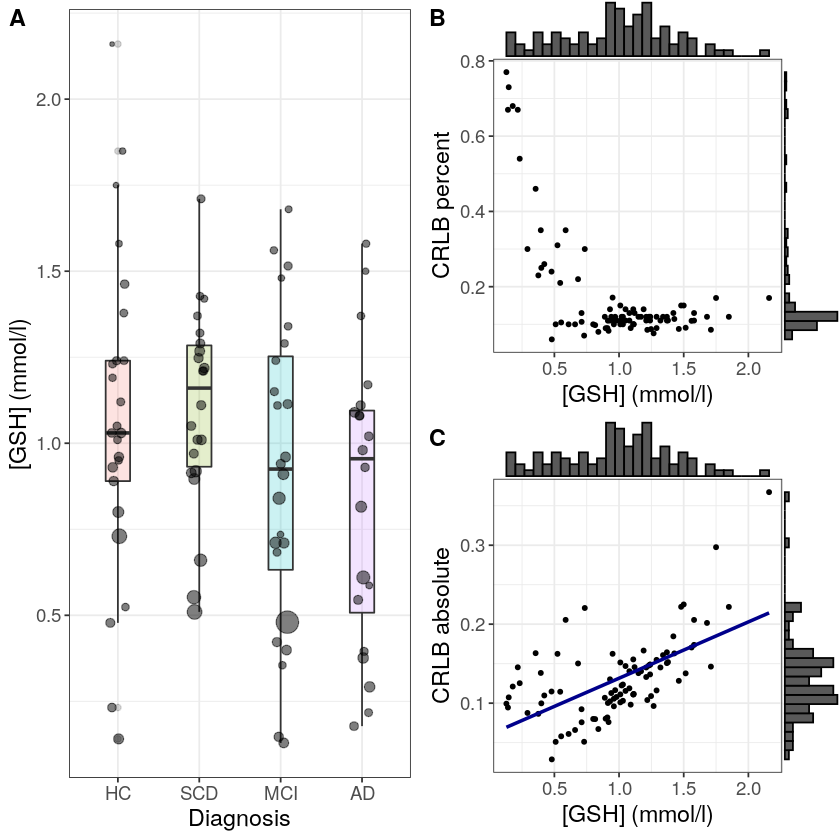

In [34]:
fc_plot <- plot_grid(hc_mrs, ad_mrs, 
          labels = c('A', 'B'), 
          label_size = 14,
          ncol = 2, 
          rel_widths = c(1, 1))
fc_plot2 <- plot_grid(gsh_vs_crlbp, gsh_vs_crlba,
                    labels = c('B', 'C'),
                    label_size = 14,
                    ncol = 1, 
                    rel_widths = c(1,1))
fc_plot3 <- plot_grid(gsh_vs_diag, fc_plot2,
                      labels= c('A'),
                     ncol=2,
                     rel_widths = c(1,1))
fc_plot3

In [35]:
ggsave("./imgs/mrs_allplots.png",
       plot=fc_plot3,
       width=8,
       height=4,
       dpi = 600)

# fMRI data

In [36]:
dim(data)

[1] 91 36

In [37]:
# Exclude Subjects that didn't pass the QC

In [38]:
data_qc <- subset(data, QC != 'R')

In [39]:
dim(data_qc)

[1] 83 36

In [40]:
# More severe QC selection
#data_qc <- subset(data_qc, QC != 'Y')

In [41]:
dim(data_qc)

[1] 83 36

In [42]:
## ICA based analysis

In [43]:
### PCC to DMN

In [44]:
dmn_vs_diag <- ggplot(data_qc %>% mutate(diag=factor(diagnosis, levels=diag_order)),
                      aes(x=diag, y=pcc_dmn_sph)) +
    geom_boxplot(alpha = 0.2, width = 0.3, aes(fill=factor(diag)),show.legend = FALSE) +
    xlab('Diagnosis') +
    ylab('rsFC PCC-DMN') +
    theme(strip.text.x = element_text(size=9, color="black", face="bold")) +
#     stat_compare_means(method = "anova", 
#                        position = "identity",
#                        label.x.npc = "center",
#                        label.y.npc = "bottom",
#                        label = "p.format",
#                        size = 5) +
#stat_summary(fun.y=mean, geom="point", shape=10, size=7, color="red", fill="red") +
theme_bw() +
theme(text = element_text(size=12)) +
geom_jitter(size=1, position=position_jitter(width=0.1), alpha=0.5,show.legend = NA)
#dmn_vs_diag

In [45]:
# PCC to DMN ANCOVA
fit2=aov(pcc_dmn_sph~diag_fact+Age,data_qc)
Anova(fit2, type="III")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.09048599,1,10.2312776,0.001996321
diag_fact,0.87066599,3,2.7229528,0.049928442
Age,0.03264267,1,0.3062637,0.581564925
Residuals,8.31351762,78,NA,NA


In [46]:
s2v <- ggplot(data_qc %>% mutate(diag=factor(diagnosis, levels=diag_order)),
                      aes(x=diag, y=Seed.to.Voxel)) +
    geom_boxplot(alpha = 0.2, width = 0.3, aes(fill=factor(diag)),show.legend = FALSE) +
    xlab('Diagnosis') +
    ylab('rsFC seed-based') +
    theme(strip.text.x = element_text(size=9, color="black", face="bold")) +
#     stat_compare_means(method = "anova", 
#                        position = "identity",
#                        label.x.npc = "center",
#                        label.y.npc = "bottom",
#                        label = "p.format",
#                        size = 5) +
#stat_summary(fun.y=mean, geom="point", shape=10, size=7, color="red", fill="red") +
theme_bw() +
theme(text = element_text(size=12)) +
geom_jitter(size=1, position=position_jitter(width=0.1), alpha=0.5,show.legend = NA)
#s2v

In [47]:
fit=aov(Seed.to.Voxel~diag_fact+Age,data_qc)
Anova(fit, type='III')

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.2330342097,1,69.7295478,1.968382e-12
diag_fact,0.0113285833,3,1.1299299,3.422128e-01
Age,0.0003467816,1,0.1037656,7.482185e-01
Residuals,0.2606738312,78,NA,NA


In [48]:
mpfc_vs_diag <- ggplot(data_qc %>% mutate(diag=factor(diagnosis, levels=diag_order)), 
                     aes(x=diag, y=pcc_mpfc_sph)) +
    geom_boxplot(alpha = 0.2, width = 0.3, aes(fill=factor(diag)),show.legend = FALSE) +
    xlab('Diagnosis') +
    ylab('rsFC PCC-MPFC') +
    theme(strip.text.x = element_text(size=9, color="black", face="bold")) +
#     stat_compare_means(method = "anova", 
#                        position = "identity",
#                        label.x.npc = "center",
#                        label.y.npc = "bottom",
#                        label = "p.format",
#                        size = 5) +
theme(text = element_text(size=14)) +
theme() +
theme_bw() +
geom_jitter(size=1, position=position_jitter(width=0.1), alpha=0.5,show.legend = NA)

#mpfc_vs_diag

In [49]:
fit2=aov(pcc_mpfc_sph~diag_fact+Age,data_qc)
Anova(fit2, type="III")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.6830412,1,6.823725,0.01078697
diag_fact,0.4627523,3,1.540998,0.21054206
Age,0.1036904,1,1.035889,0.31192605
Residuals,7.8076434,78,NA,NA


In [50]:
lipl_vs_diag <- ggplot(data_qc %>% mutate(diag=factor(diagnosis, levels=diag_order)), 
                     aes(x=diag, y=pcc_lipl_sph)) +
    geom_boxplot(alpha = 0.2, width = 0.3, aes(fill=factor(diag)),show.legend = FALSE) +
    xlab('Diagnosis') +
    ylab('rsFC PCC-LIPL') +
    theme(strip.text.x = element_text(size=9, color="black", face="bold")) +
#     stat_compare_means(method = "anova", 
#                        position = "identity",
#                        label.x.npc = "center",
#                        label.y.npc = "bottom",
#                        label = "p.format",
#                        size = 5) +
theme(text = element_text(size=14)) +
theme() +
theme_bw() +
geom_jitter(size=1, position=position_jitter(width=0.1), alpha=0.5,show.legend = NA)

#lipl_vs_diag

In [51]:
fit2=aov(pcc_lipl_sph~diag_fact+Age,data_qc)
Anova(fit2, type="III")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.88043105,1,7.143822,0.009156623
diag_fact,0.30591182,3,0.827390,0.482740244
Age,0.08578131,1,0.696030,0.406668756
Residuals,9.61300894,78,NA,NA


In [52]:
ripl_vs_diag <- ggplot(data_qc %>% mutate(diag=factor(diagnosis, levels=diag_order)), 
                     aes(x=diag, y=pcc_ripl_sph)) +
    geom_boxplot(alpha = 0.2, width = 0.3, 
                 aes(fill=factor(diag)),show.legend = FALSE) +
    xlab('Diagnosis') +
    ylab('rsFC PCC-RIPL') +
    theme(strip.text.x = element_text(size=9, color="black", face="bold")) +
#     stat_compare_means(method = "anova", 
#                        position = "identity",
#                        label.x.npc = "center",
#                        label.y.npc = "bottom",
#                        label = "p.format",
#                        size = 5) +
theme(text = element_text(size=14)) +
theme() +
theme_bw() +
geom_jitter(size=1, position=position_jitter(width=0.1), alpha=0.5,show.legend = NA)

#ripl_vs_diag

In [53]:
fit2=aov(pcc_ripl_sph~diag_fact+Age,data_qc)
Anova(fit2, type="III")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.28158632,1,2.6277182,0.109048416
diag_fact,1.37726517,3,4.2841390,0.007479554
Age,0.04395756,1,0.4102049,0.523742646
Residuals,8.35848106,78,NA,NA


In [54]:
fc_plot <- plot_grid(dmn_vs_diag, s2v, 
          labels = c('A', 'B'), 
          label_size = 12,
          ncol = 2, 
          rel_widths = c(1, 1))
#fc_plot
fc_plot2 <- plot_grid(mpfc_vs_diag, lipl_vs_diag, ripl_vs_diag, 
          labels = c('C', 'D', 'E'), 
          label_size = 12,
          ncol = 3, 
          rel_widths = c(1, 1,1))
#fc_plot2

In [55]:
fc_plot <- plot_grid(dmn_vs_diag, mpfc_vs_diag, 
          labels = c('A', 'B'), 
          label_size = 12,
          ncol = 2, 
          rel_widths = c(1, 1))
#fc_plot
fc_plot2 <- plot_grid(lipl_vs_diag, ripl_vs_diag, 
          labels = c('C', 'D'), 
          label_size = 12,
          ncol = 2, 
          rel_widths = c(1, 1))
#fc_plot2

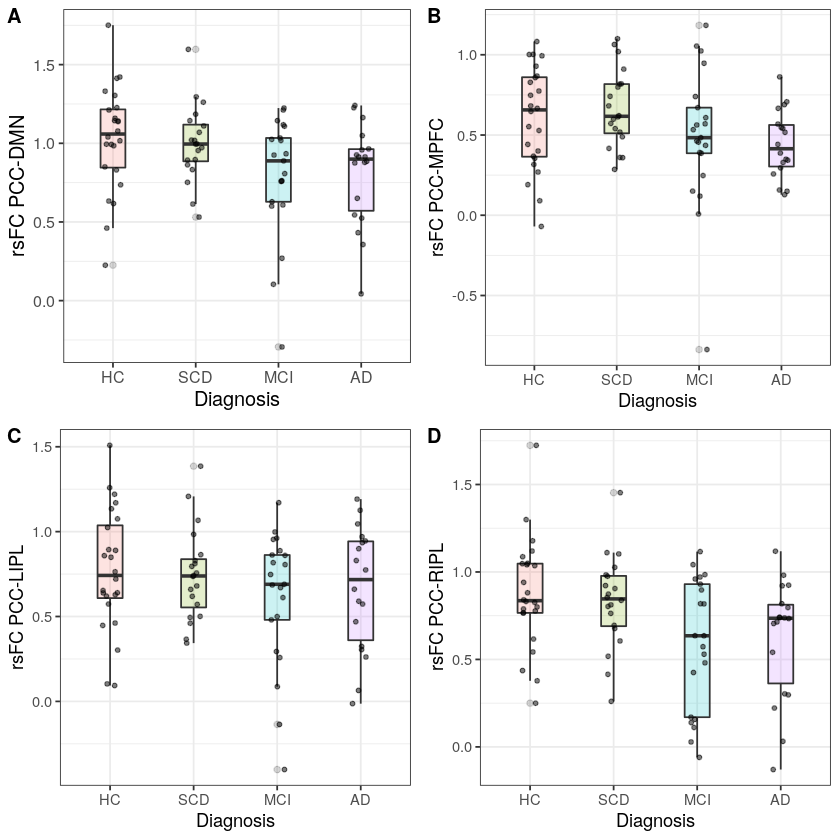

In [56]:
fc_plot3 <- plot_grid(fc_plot, fc_plot2,
          ncol = 1, 
          rel_widths = c(1, 1))
fc_plot3

In [87]:
ggsave("./imgs/fmri_allplots.png",
       plot=fc_plot3,
       width=6,
       height=4,
       dpi = 600)

# Memory Scores

Warning message:
"Removed 3 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 3 rows containing missing values (geom_point)."


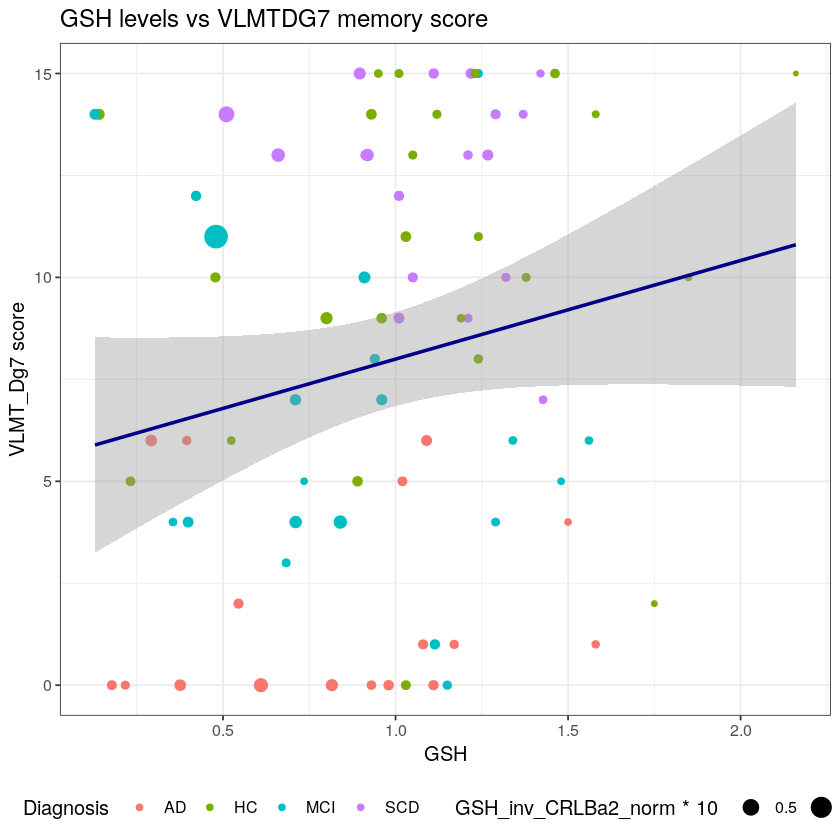

In [57]:
#options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 2000, repr.plot.quality=600)
p <- ggplot(data_qc %>% mutate(diag=factor(diag, levels=diag_order)), 
            aes(y=VLMTDG7, x=GSH)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
  scale_shape_manual(values = c(16, 17, 18)) + 
    xlab('GSH') +
    ylab('VLMT_Dg7 score') +
    labs(color='Diagnosis') +
theme_bw() +
theme(legend.position = "bottom") +
labs(title = "GSH levels vs VLMTDG7 memory score") +
theme(text = element_text(size=12)) +
geom_smooth(method="lm", formula = 'y ~ x', se=95, fullrange=TRUE, color='darkblue')
  #stat_smooth(method="lm", formula =  y~x , data=data, aes(weight=inv_aCRLB_norm), color="darkred")
#p<- ggMarginal(p, type = "histogram")
p

In [58]:
summary(lm(VLMTDG7 ~ GSH+Age, weights=w_norm, data=data_qc))


Call:
lm(formula = VLMTDG7 ~ GSH + Age, data = data_qc, weights = w_norm)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-9.1229 -4.3240 -0.2658  4.4339  8.7293 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  21.4259     6.4194   3.338   0.0013 **
GSH           1.3983     1.4021   0.997   0.3217   
Age          -0.2096     0.0842  -2.489   0.0150 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.007 on 77 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1031,	Adjusted R-squared:  0.07984 
F-statistic: 4.427 on 2 and 77 DF,  p-value: 0.01513


Warning message:
"Removed 3 rows containing missing values (geom_point)."
Warning message:
"Removed 3 rows containing missing values (geom_point)."


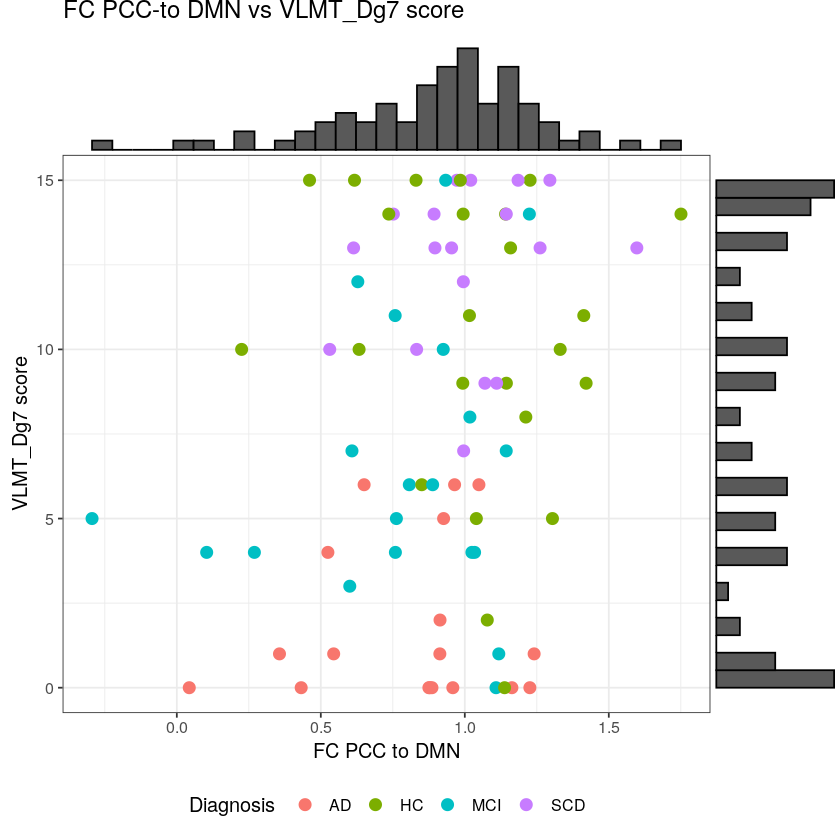

In [88]:
#options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 2000, repr.plot.quality=600)
p <- ggplot(data_qc %>% mutate(diag=factor(diag, levels=diag_order)), aes(y=VLMTDG7, x=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis), size=3) +
  scale_shape_manual(values = c(16, 17, 18)) + 
    xlab('FC PCC to DMN') +
    ylab('VLMT_Dg7 score') +
    labs(color='Diagnosis') +
theme_bw() +
theme(legend.position = "bottom") +
labs(title = "FC PCC-to DMN vs VLMT_Dg7 score") +
theme(text = element_text(size=12)) #+
#geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkblue')
  #stat_smooth(method="lm", formula =  y~x , data=data, aes(weight=inv_aCRLB_norm), color="darkred")
p<- ggMarginal(p, type = "histogram")
p

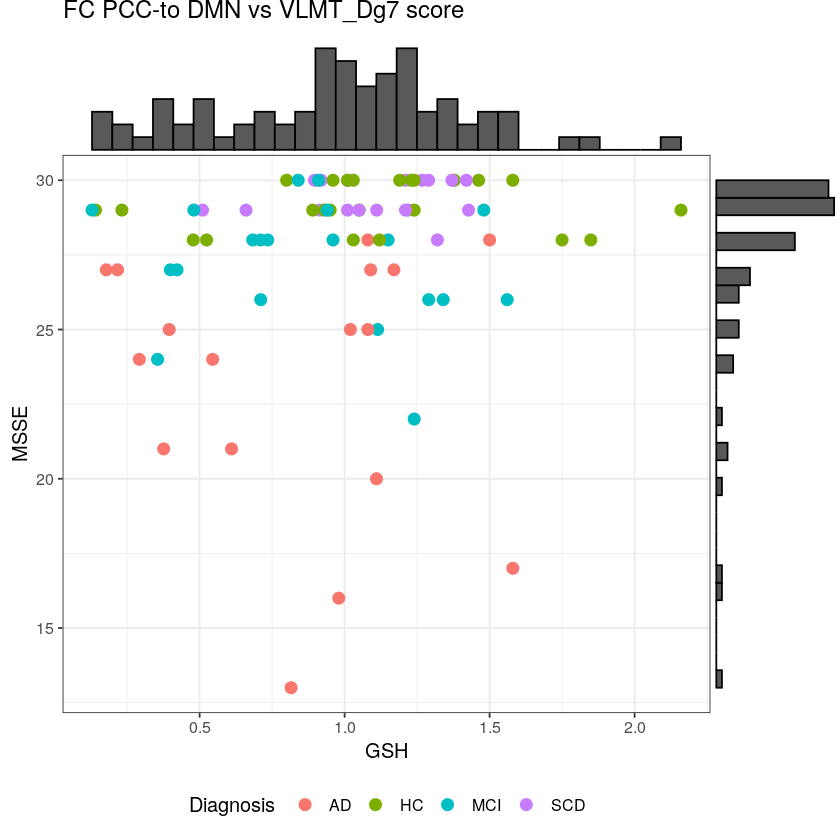

In [66]:
data_qcmsse <- subset(data_qc, MMSE<100)
#options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 2000, repr.plot.quality=600)
p <- ggplot(data_qcmsse %>% mutate(diag=factor(diag, levels=diag_order)), aes(y=MMSE, x=GSH)) + 
  geom_point(aes(color = diagnosis), size=3) +
  scale_shape_manual(values = c(16, 17, 18)) + 
    xlab('GSH') +
    ylab('MSSE') +
    labs(color='Diagnosis') +
theme_bw() +
theme(legend.position = "bottom") +
labs(title = "FC PCC-to DMN vs VLMT_Dg7 score") +
theme(text = element_text(size=12)) #+
#geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkblue')
  #stat_smooth(method="lm", formula =  y~x , data=data, aes(weight=inv_aCRLB_norm), color="darkred")
p<- ggMarginal(p, type = "histogram")
p

In [2]:
#options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 2000, repr.plot.quality=600)
p <- ggplot(data_qc %>% mutate(diag=factor(diag, levels=diag_order)), aes(y=VLMTDG7, x=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
  scale_shape_manual(values = c(16, 17, 18)) + 
    xlab('GSH') +
    ylab('VLMT_Dg7 score') +
    labs(color='Diagnosis') +
theme_bw() +
theme(legend.position = "bottom") +
labs(title = "FC PCC-to DMN vs VLMT_Dg7 score") +
theme(text = element_text(size=12)) +
geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkblue')
  #stat_smooth(method="lm", formula =  y~x , data=data, aes(weight=inv_aCRLB_norm), color="darkred")
p<- ggMarginal(p, type = "histogram")
p

ERROR: Error in ggplot(data_qc %>% mutate(diag = factor(diag, levels = diag_order)), : could not find function "ggplot"


In [91]:
cor_data <- subset(data_qc[c('', )
cor.test(data_qc$VLMT_Dg7, data_qc$GSH, method='spearman')

ERROR: Error in parse(text = x, srcfile = src): <text>:2:1: unexpected symbol
1: cor_data <- subset(data_qc[c('', )
2: cor.test
   ^


In [ ]:
# ggsave("VLMDG.eps",
#        plot=p,
#        width=4,
#        height=4,
#        dpi = 600)
# ggsave("VLMDG.png",
#        plot=p,
#        width=4,
#        height=4,
#        dpi = 600)

In [ ]:
# cor.test(data$VLMT_Dg7, data$pcc2dmn_gm, method='spearman')

In [ ]:
# #options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 2000, repr.plot.quality=600)
# p <- ggplot(data %>% mutate(diag=factor(diag, levels=diag_order)), aes(y=VLMT_Dg7, x=GSH_All)) + 
#   geom_point(aes(color = diag), size=3) +
#   scale_shape_manual(values = c(16, 17, 18)) + 
#     xlab('[GSH]') +
#     ylab('VLMT_Dg7 score') +
#     labs(color='Diagnosis') +
# theme_bw() +
# theme(legend.position = "bottom") +
# labs(title = "GSH concentrations vs VLMT_Dg7 score") +
# theme(text = element_text(size=12)) +
# geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = inv_aCRLB_norm), se=FALSE, fullrange=TRUE, color='darkblue')
#   #stat_smooth(method="lm", formula =  y~x , data=data, aes(weight=inv_aCRLB_norm), color="darkred")
# p<- ggMarginal(p, type = "histogram")
# p

In [ ]:
# cor.test(data$VLMT_Dg7,  data$GSH_All, method='spearman')

# GSH and FCs

In [ ]:
dim(data_qc)

In [ ]:
data_qc <- subset(data_qc, !is.na(GSH))

In [ ]:
dim(data_qc)

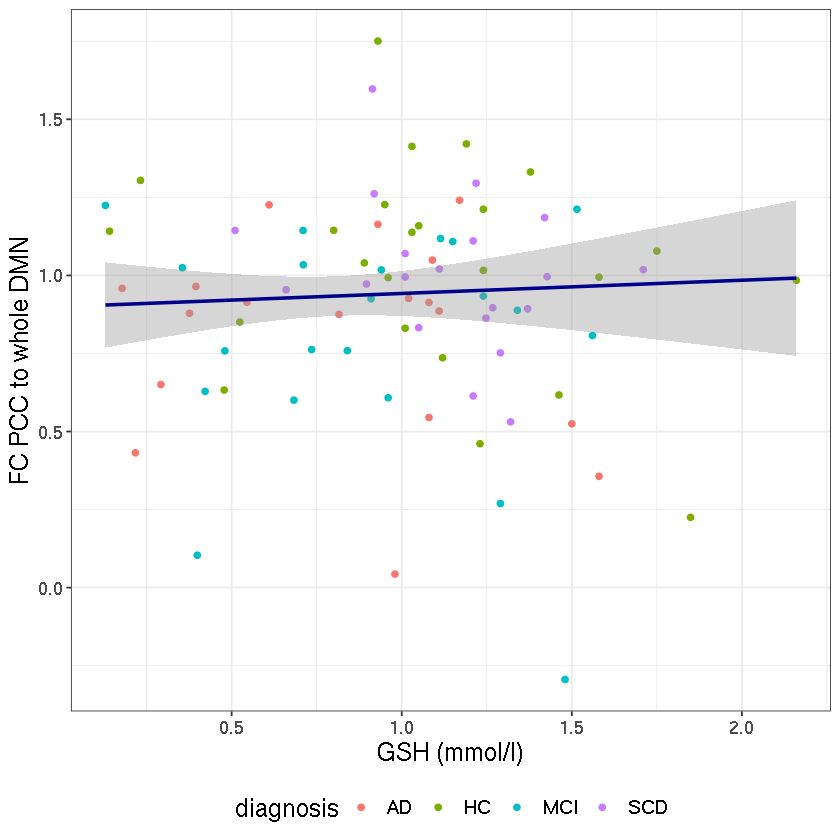

In [55]:
gsh_vs_dmn<- ggplot(data_qc, aes(x=GSH, y=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis)) +
  scale_shape_manual(values = c(16, 17, 18)) +
theme_bw() +
  theme(legend.position = "bottom") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
#  geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), fullrange=TRUE, color='darkblue', na.rm=TRUE)
gsh_vs_dmn

In [56]:
legend <- get_legend(gsh_vs_dmn + 
                     theme(legend.box.margin = margin(0, 0, 0, 12),
                     legend.text = element_text(size = 14),
                     legend.title = element_text(size = 14)) +
                     guides(colour = guide_legend(override.aes = list(size=4))))
legend

TableGrob (5 x 5) "guide-box": 2 grobs
                                    z     cells                  name
99_d7dca6981fdd4a0eb5ec5925fc1bd2d8 1 (3-3,3-3)                guides
                                    0 (2-4,2-4) legend.box.background
                                              grob
99_d7dca6981fdd4a0eb5ec5925fc1bd2d8 gtable[layout]
                                    zeroGrob[NULL]

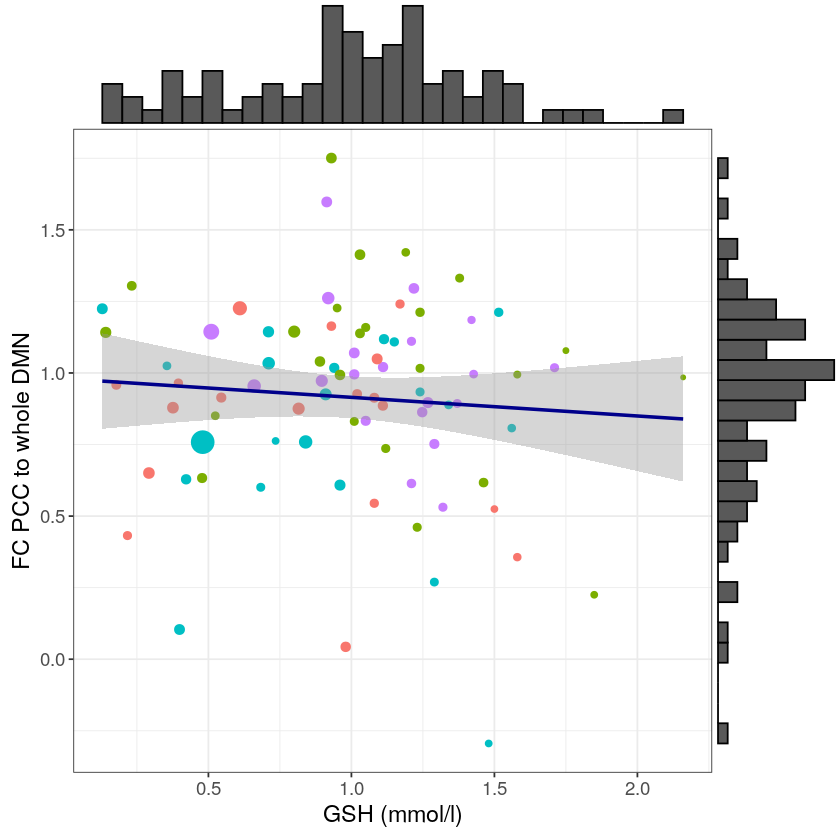

In [93]:
gsh_vs_dmn<- ggplot(data_qc, aes(x=GSH, y=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
  scale_shape_manual(values = c(16, 17, 18)) + 
theme_bw() +
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
#  geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = w_norm), fullrange=TRUE, color='darkblue', na.rm=TRUE)
gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

In [59]:
summary(lm(pcc_dmn_sph ~ GSH+Age, weights=w_norm, data=data_qc))


Call:
lm(formula = pcc_dmn_sph ~ GSH + Age, data = data_qc, weights = w_norm)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.19786 -0.14496  0.03581  0.20230  0.84096 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.509631   0.418981   3.603 0.000545 ***
GSH         -0.093567   0.090511  -1.034 0.304361    
Age         -0.007128   0.005494  -1.297 0.198265    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.333 on 80 degrees of freedom
Multiple R-squared:  0.02715,	Adjusted R-squared:  0.002832 
F-statistic: 1.116 on 2 and 80 DF,  p-value: 0.3325


In [59]:
gsh_vs_s2v<- ggplot(data_qc, aes(x=GSH, y=Seed.to.Voxel)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
theme_bw() +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC Seed based') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") + 
  theme(text = element_text(size=14))+
  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), fullrange=TRUE, color='darkblue', na.rm=TRUE)
gsh_vs_s2v <- ggMarginal(gsh_vs_s2v, type = "histogram")
#gsh_vs_s2v

In [60]:
summary(lm(Seed.to.Voxel ~ GSH+Age, weights=GSH_inv_CRLBa2_norm, data=data_qc))


Call:
lm(formula = Seed.to.Voxel ~ GSH + Age, data = data_qc, weights = GSH_inv_CRLBa2_norm)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.019363 -0.003312 -0.000294  0.003046  0.014378 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.4711486  0.0797847   5.905 8.16e-08 ***
GSH         0.0321098  0.0182918   1.755    0.083 .  
Age         0.0007394  0.0010652   0.694    0.490    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005991 on 80 degrees of freedom
Multiple R-squared:  0.03847,	Adjusted R-squared:  0.01443 
F-statistic:   1.6 on 2 and 80 DF,  p-value: 0.2082


In [61]:
# LM with individuals ROIs

In [62]:
gsh_vs_mpfc<- ggplot(data_qc, aes(x=GSH, y=pcc_mpfc_sph)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
theme_bw() +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to MPFC') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), fullrange=TRUE, color='darkblue', na.rm=TRUE)
gsh_vs_mpfc <- ggMarginal(gsh_vs_mpfc, type = "histogram")
#gsh_vs_mpfc

In [63]:
summary(lm(pcc_mpfc_sph ~ GSH+Age, weights=GSH_inv_CRLBa2_norm, data=data_qc))


Call:
lm(formula = pcc_mpfc_sph ~ GSH + Age, data = data_qc, weights = GSH_inv_CRLBa2_norm)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.075252 -0.017059 -0.004375  0.015139  0.053604 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.269574   0.352420   3.602 0.000546 ***
GSH          0.077279   0.080798   0.956 0.341724    
Age         -0.010792   0.004705  -2.294 0.024440 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02646 on 80 degrees of freedom
Multiple R-squared:  0.08433,	Adjusted R-squared:  0.06144 
F-statistic: 3.684 on 2 and 80 DF,  p-value: 0.02948


In [64]:
gsh_vs_ripl<- ggplot(data_qc, aes(x=GSH, y=pcc_ripl_sph)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
theme_bw() +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to RIPL') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), fullrange=TRUE, color='darkblue', na.rm=TRUE)
gsh_vs_ripl <- ggMarginal(gsh_vs_ripl, type = "histogram")
#gsh_vs_ripl

In [65]:
summary(lm(pcc_ripl_sph ~ GSH+Age, weights=GSH_inv_CRLBa2_norm, data=data_qc))


Call:
lm(formula = pcc_ripl_sph ~ GSH + Age, data = data_qc, weights = GSH_inv_CRLBa2_norm)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.089027 -0.021077  0.001341  0.019108  0.100096 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.292380   0.447297   0.654    0.515
GSH         0.089023   0.102549   0.868    0.388
Age         0.005337   0.005972   0.894    0.374

Residual standard error: 0.03359 on 80 degrees of freedom
Multiple R-squared:  0.01588,	Adjusted R-squared:  -0.008726 
F-statistic: 0.6453 on 2 and 80 DF,  p-value: 0.5272


In [66]:
gsh_vs_lipl<- ggplot(data_qc, aes(x=GSH, y=pcc_lipl_sph)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
  scale_shape_manual(values = c(16, 17, 18)) + 
theme_bw() +
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to LIPL') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), fullrange=TRUE, color='darkblue', na.rm=TRUE)
gsh_vs_lipl <- ggMarginal(gsh_vs_lipl, type = "histogram")
#gsh_vs_lipl

In [67]:
summary(lm(pcc_lipl_sph ~ GSH+Age, weights=GSH_inv_CRLBa2_norm, data=data_qc))


Call:
lm(formula = pcc_lipl_sph ~ GSH + Age, data = data_qc, weights = GSH_inv_CRLBa2_norm)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.082837 -0.016246 -0.000097  0.021335  0.090840 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.816974   0.436432   1.872   0.0649 .
GSH          0.054411   0.100058   0.544   0.5881  
Age         -0.002258   0.005827  -0.387   0.6994  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03277 on 80 degrees of freedom
Multiple R-squared:  0.006879,	Adjusted R-squared:  -0.01795 
F-statistic: 0.277 on 2 and 80 DF,  p-value: 0.7587


In [ ]:
# library(cowplot)
# fc_plot1 <- plot_grid(gsh_vs_mpfc, gsh_vs_ripl, gsh_vs_lipl,
#                labels = c('C', 'D', 'E'),
#                label_size = 14,
#                ncol=3)
# fc_plot2 <- plot_grid(gsh_vs_dmn, gsh_vs_s2v,
#                labels = c('A', 'B'),
#                label_size = 14,
#                ncol=2)
# fc_plot3 <- plot_grid(fc_plot2, fc_plot1,
#                      ncol=1)
# fc_plot4 <- plot_grid(fc_plot3, legend,
#                       ncol=1, 
#                       rel_heights=c(1,0.1)) 
# fc_plot4

In [ ]:
# ggsave("./imgs/LM_allplots.png",
#        plot=fc_plot4,
#        width=8,
#        height=6,
#        dpi = 1000)

# Compare with non-weighted model

In [61]:
data_qc2 <- subset(data_qc, GSH_CRLBp < 0.2)

In [62]:
summary(lm(pcc_dmn_sph ~ GSH+Age, data=data_qc2))


Call:
lm(formula = pcc_dmn_sph ~ GSH + Age, data = data_qc2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18282 -0.12377  0.00814  0.18101  0.75886 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.713980   0.443127   3.868  0.00026 ***
GSH         -0.317343   0.132097  -2.402  0.01920 *  
Age         -0.005931   0.005651  -1.049  0.29791    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3316 on 64 degrees of freedom
Multiple R-squared:  0.08929,	Adjusted R-squared:  0.06083 
F-statistic: 3.137 on 2 and 64 DF,  p-value: 0.05013


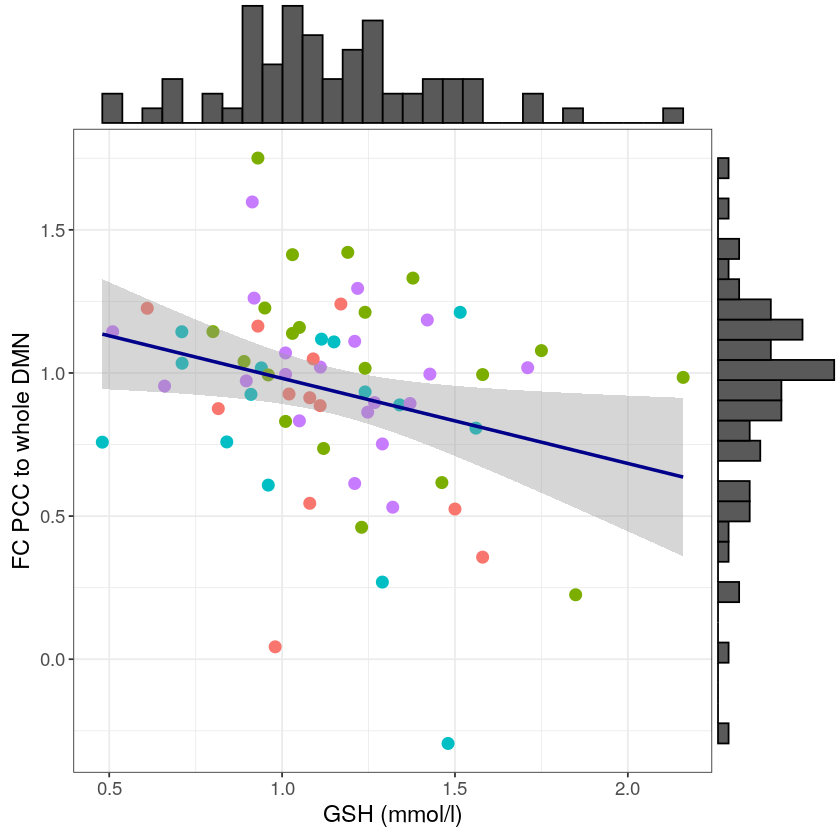

In [63]:
gsh_vs_dmn2<- ggplot(data_qc2, aes(x=GSH, y=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis), size=3) +
  scale_shape_manual(values = c(16, 17, 18)) + 
theme_bw() +
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
#  geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', fullrange=TRUE, color='darkblue', na.rm=TRUE)
gsh_vs_dmn2 <- ggMarginal(gsh_vs_dmn2, type = "histogram")
gsh_vs_dmn2

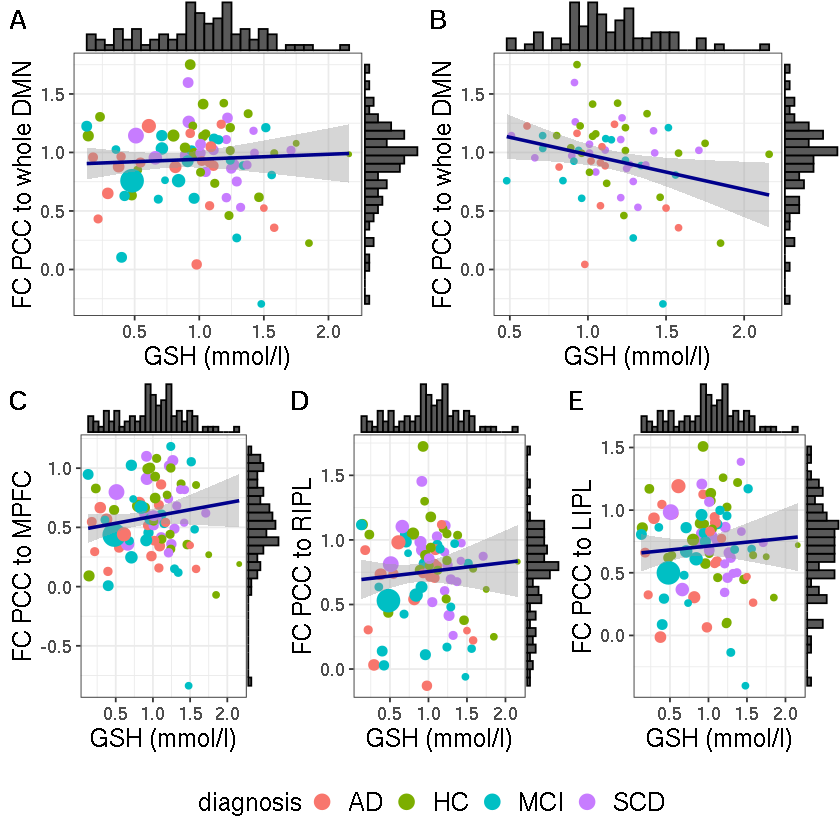

In [85]:
library(cowplot)
fc_plot1 <- plot_grid(gsh_vs_mpfc, gsh_vs_ripl, gsh_vs_lipl,
               labels = c('C', 'D', 'E'),
               label_size = 14,
               ncol=3)
fc_plot2 <- plot_grid(gsh_vs_dmn, gsh_vs_dmn2,
               labels = c('A', 'B'),
               label_size = 14,
               ncol=2)
fc_plot3 <- plot_grid(fc_plot2, fc_plot1,
                     ncol=1)
fc_plot4 <- plot_grid(fc_plot3, legend,
                      ncol=1, 
                      rel_heights=c(1,0.1)) 
fc_plot4
ggsave("./imgs/LM_allplots.png",
       plot=fc_plot4,
       width=12,
       height=8,
       dpi = 1000)

In [122]:
# Seed-to-Voxel

Warning message:
"Removed 1 rows containing missing values (geom_point)."


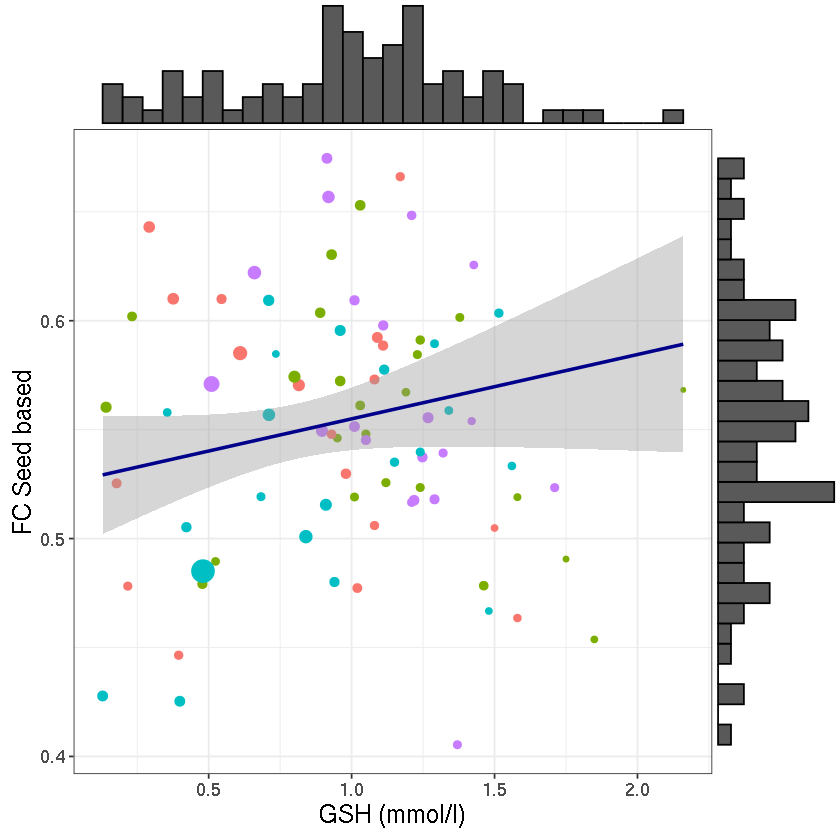

In [124]:
gsh_vs_s2v<- ggplot(data_qc, aes(x=GSH, y=Seed.to.Voxel)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
theme_bw() +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC Seed based') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") + 
  theme(text = element_text(size=14))+
  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), fullrange=TRUE, color='darkblue', na.rm=TRUE)
gsh_vs_s2v <- ggMarginal(gsh_vs_s2v, type = "histogram")
gsh_vs_s2v

In [129]:
summary(lm(Seed.to.Voxel ~ GSH+Age, data=data_qc))


Call:
lm(formula = Seed.to.Voxel ~ GSH + Age, data = data_qc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.140673 -0.031230 -0.000675  0.038015  0.119424 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.6003217  0.0728410   8.242 2.72e-12 ***
GSH         -0.0061058  0.0157835  -0.387    0.700    
Age         -0.0006290  0.0009529  -0.660    0.511    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05826 on 80 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.006081,	Adjusted R-squared:  -0.01877 
F-statistic: 0.2447 on 2 and 80 DF,  p-value: 0.7835


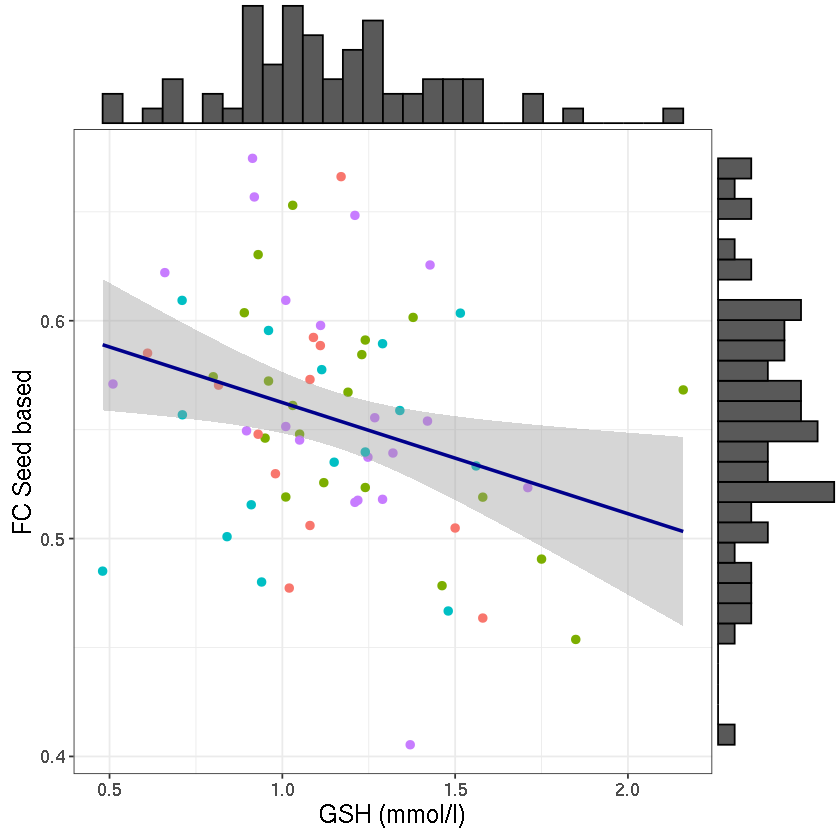

In [134]:
gsh_vs_s2v2<- ggplot(data_qc2, aes(x=GSH, y=Seed.to.Voxel)) + 
  geom_point(aes(color = diagnosis), size=2) +
theme_bw() +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC Seed based') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") + 
  theme(text = element_text(size=14))+
  geom_smooth(method="lm", formula = 'y ~ x', fullrange=TRUE, color='darkblue', na.rm=TRUE)
gsh_vs_s2v2 <- ggMarginal(gsh_vs_s2v2, type = "histogram")
gsh_vs_s2v2

In [130]:
summary(lm(Seed.to.Voxel ~ GSH+Age, data=data_qc2))


Call:
lm(formula = Seed.to.Voxel ~ GSH + Age, data = data_qc2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.135110 -0.027305 -0.003146  0.031990  0.113477 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.6675807  0.0697481   9.571 5.76e-14 ***
GSH         -0.0535145  0.0207920  -2.574   0.0124 *  
Age         -0.0007368  0.0008895  -0.828   0.4106    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05219 on 64 degrees of freedom
Multiple R-squared:  0.09652,	Adjusted R-squared:  0.06829 
F-statistic: 3.419 on 2 and 64 DF,  p-value: 0.03885


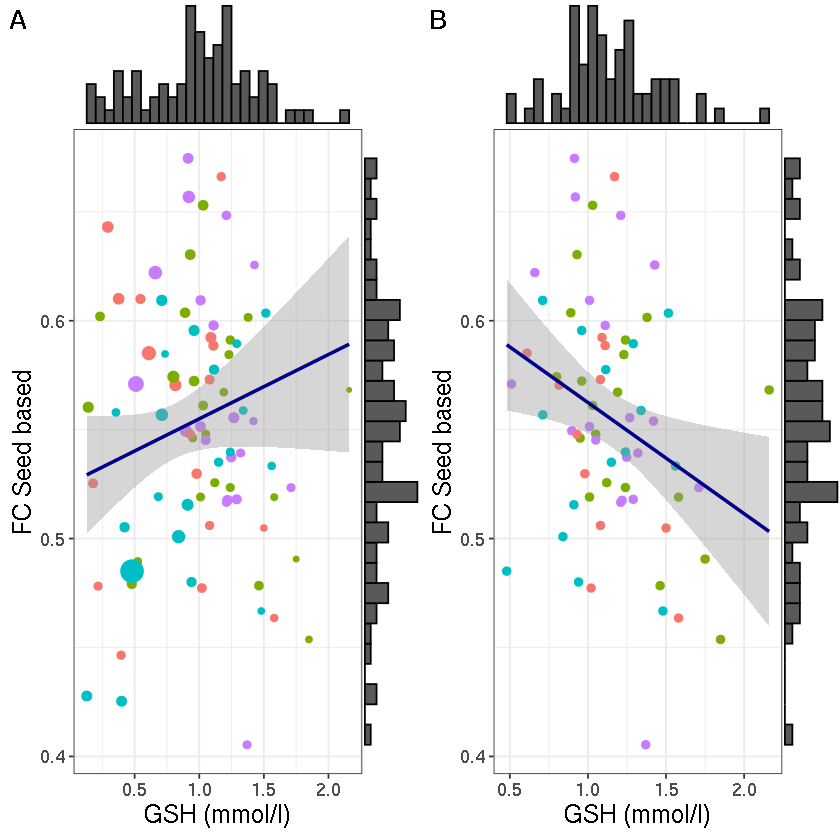

In [135]:
fc_plot1 <- plot_grid(gsh_vs_s2v, gsh_vs_s2v2,
               labels = c('A', 'B'),
               label_size = 14,
               ncol=2)
fc_plot1
ggsave("./imgs/s2v.png",
       plot=fc_plot1,
       width=16,
       height=8,
       dpi = 1000)

In [ ]:
# Weights

In [ ]:
gsh_vs_dmn<- ggplot(data_gsh, aes(x=GSH, y=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))#+
  geom_text(aes(label = NeuroMET_num))
#  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE)+
#  geom_smooth(method="lm", formula = 'y ~ x', fullrange=TRUE, color='darkblue', se=FALSE, na.rm=TRUE)

gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

In [ ]:
data['invCRLBp']

In [ ]:
gsh_vs_dmn<- ggplot(data_gsh, aes(x=GSH, y=GSH_CRLBa)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('CRLB absolute') +
  ylab('GSH_inv_CRLBa2_norm') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  #geom_text(aes(label = NeuroMET_num))
#  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE)+
  geom_smooth(method="lm", formula = 'y ~ x', fullrange=TRUE, color='darkblue', se=FALSE, na.rm=TRUE)

gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

In [ ]:
# Thresholding relative [GSH] concentration

In [ ]:
data_qc['inv_CRLBp'] = 1/data_qc['GSH_CRLBp']

In [ ]:
data_gsht <- subset(data_qc, GSH>0.5)

In [ ]:
hist(data_qc$GSH_CRLBp, breaks=100)

In [ ]:
hist(data_qc$GSH_CRLBa, breaks=100)

In [ ]:
gsh_vs_dmn<- ggplot(data_qc, aes(x=GSH, y=GSH_CRLBa)) + 
  geom_point(aes(color = diagnosis, size=inv_CRLBp)) +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme_bw()+
  theme(legend.position = "none") +
  xlab('CRLB absolute') +
  ylab('GSH_CRLBp') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  #geom_text(aes(label = NeuroMET_num))
#  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE)+
  geom_smooth(method="lm", formula = 'y ~ x', fullrange=TRUE, color='darkblue', se=FALSE, na.rm=TRUE)

gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

In [ ]:
# Participants statistics

In [ ]:
dim(subset(data, !is.na(Age)))

In [ ]:
dim(data)

In [ ]:
table(data['diagnosis'])

In [ ]:
## Ages

In [ ]:
mean(subset(data, diagnosis=='HC')$Age)

In [ ]:
sd(subset(data, diagnosis=='HC')$Age)

In [ ]:
mean(subset(data, diagnosis=='SCD')$Age)

In [ ]:
sd(subset(data, diagnosis=='SCD')$Age)

In [ ]:
mean(subset(data, diagnosis=='MCI')$Age)

In [ ]:
sd(subset(data, diagnosis=='MCI')$Age)

In [ ]:
mean(subset(data, diagnosis=='AD')$Age)

In [ ]:
sd(subset(data, diagnosis=='AD')$Age)

In [ ]:
mean(data$Age)

In [ ]:
sd(data$Age)

In [ ]:
fit <- aov(Age~diag_fact, data = data)
summary(fit)

In [ ]:
length(data_gsh$diagnosis)

In [ ]:
table(data_gsh$diagnosis)

In [ ]:
library(data.table)

In [ ]:
mean(data_gsh$GSH)
sd(data_gsh$GSH)
mean(subset(data_gsh, diagnosis=='HC')$GSH)
sd(subset(data_gsh, diagnosis=='HC')$GSH)
mean(subset(data_gsh, diagnosis=='SCD')$GSH)
sd(subset(data_gsh, diagnosis=='SCD')$GSH)
mean(subset(data_gsh, diagnosis=='MCI')$GSH)
sd(subset(data_gsh, diagnosis=='MCI')$GSH)
mean(subset(data_gsh, diagnosis=='AD')$GSH)
sd(subset(data_gsh, diagnosis=='AD')$GSH)

In [ ]:
summary(aov(GSH~diag_fact, data=data_gsh))

In [ ]:
table(data_qc$diagnosis)

In [ ]:
mean(data_qc$pcc_dmn)
sd(data_qc$pcc_dmn)
mean(subset(data_qc, diagnosis=='HC')$pcc_dmn)
sd(subset(data_qc, diagnosis=='HC')$pcc_dmn)
mean(subset(data_qc, diagnosis=='SCD')$pcc_dmn)
sd(subset(data_qc, diagnosis=='SCD')$pcc_dmn)
mean(subset(data_qc, diagnosis=='MCI')$pcc_dmn)
sd(subset(data_qc, diagnosis=='MCI')$pcc_dmn)
mean(subset(data_qc, diagnosis=='AD')$pcc_dmn)
sd(subset(data_qc, diagnosis=='AD')$pcc_dmn)

In [ ]:
summary(aov(pcc_dmn_sph~diag_fact, data=data_qc))

In [ ]:
mean(data_qc$Seed.to.Voxel)
sd(data_qc$Seed.to.Voxel)
mean(subset(data_qc, diagnosis=='HC')$Seed.to.Voxel)
sd(subset(data_qc, diagnosis=='HC')$Seed.to.Voxel)
mean(subset(data_qc, diagnosis=='SCD')$Seed.to.Voxel)
sd(subset(data_qc, diagnosis=='SCD')$Seed.to.Voxel)
mean(subset(data_qc, diagnosis=='MCI')$Seed.to.Voxel)
sd(subset(data_qc, diagnosis=='MCI')$Seed.to.Voxel)
mean(subset(data_qc, diagnosis=='AD')$Seed.to.Voxel)
sd(subset(data_qc, diagnosis=='AD')$Seed.to.Voxel)

In [ ]:
summary(aov(Seed.to.Voxel~diag_fact, data=data_qc))

In [ ]:
# GROUP CRLB

In [ ]:
mean(data_gsh$GSH_CRLBp)
sd(data_gsh$GSH_CRLBp)
mean(subset(data_gsh, diagnosis=='HC')$GSH_CRLBp)
sd(subset(data_gsh, diagnosis=='HC')$GSH_CRLBp)
mean(subset(data_gsh, diagnosis=='SCD')$GSH_CRLBp)
sd(subset(data_gsh, diagnosis=='SCD')$GSH_CRLBp)
mean(subset(data_gsh, diagnosis=='MCI')$GSH_CRLBp)
sd(subset(data_gsh, diagnosis=='MCI')$GSH_CRLBp)
mean(subset(data_gsh, diagnosis=='AD')$GSH_CRLBp)
sd(subset(data_gsh, diagnosis=='AD')$GSH_CRLBp)

In [ ]:
crlbp_diag <- ggplot(data_gsh %>% mutate(diag=factor(diagnosis, levels=diag_order)), 
                     aes(x=diag, y=GSH_CRLBp)) +
    geom_boxplot(alpha = 0.2, width = 0.3, 
                 aes(fill=factor(diag)),show.legend = FALSE) +
theme_bw() +

    xlab('Diagnosis') +
    ylab('%CRLB') +
    theme(strip.text.x = element_text(size=9, color="black", face="bold")) +
#     stat_compare_means(method = "anova", 
#                        position = "identity",
#                        label.x.npc = "center",
#                        label.y.npc = "bottom",
#                        label = "p.format",
#                        size = 5) +
theme(text = element_text(size=14)) +
geom_jitter(size=1, position=position_jitter(width=0.1), alpha=0.5,show.legend = NA)

#crlbp_diag

In [ ]:
summary(aov(GSH_CRLBp~diag_fact, data=data_gsh))

In [ ]:
mean(data_gsh$GSH_CRLBa)
sd(data_gsh$GSH_CRLBa)
mean(subset(data_gsh, diagnosis=='HC')$GSH_CRLBa)
sd(subset(data_gsh, diagnosis=='HC')$GSH_CRLBa)
mean(subset(data_gsh, diagnosis=='SCD')$GSH_CRLBa)
sd(subset(data_gsh, diagnosis=='SCD')$GSH_CRLBa)
mean(subset(data_gsh, diagnosis=='MCI')$GSH_CRLBa)
sd(subset(data_gsh, diagnosis=='MCI')$GSH_CRLBa)
mean(subset(data_gsh, diagnosis=='AD')$GSH_CRLBa)
sd(subset(data_gsh, diagnosis=='AD')$GSH_CRLBa)

In [ ]:
crlba_diag <- ggplot(data_gsh %>% mutate(diag=factor(diagnosis, levels=diag_order)), 
                     aes(x=diag, y=GSH_CRLBa)) +
    geom_boxplot(alpha = 0.2, width = 0.3, 
                 aes(fill=factor(diag)),show.legend = FALSE) +
theme_bw() +

    xlab('Diagnosis') +
    ylab('absolute CRLB') +
    theme(strip.text.x = element_text(size=9, color="black", face="bold")) +
#     stat_compare_means(method = "anova", 
#                        position = "identity",
#                        label.x.npc = "center",
#                        label.y.npc = "bottom",
#                        label = "p.format",
#                        size = 5) +
theme(text = element_text(size=14)) +
geom_jitter(size=1, position=position_jitter(width=0.1), alpha=0.5,show.legend = NA)

#crlba_diag

In [ ]:
summary(aov(GSH_CRLBa~diag_fact, data=data_gsh))

In [ ]:
fc_plot <- plot_grid(crlbp_diag, crlba_diag,
                    labels = c('A', 'B'))
fc_plot

# CRLB as threshold

In [86]:
data_crlb <- subset(data_gsh, GSH_CRLBp <= 0.20)

In [87]:
data_crlb2 <- subset(data, GSH_CRLBp <= 0.20 & QC != 'R')

In [88]:
summary(lm(pcc_dmn_sph ~ GSH+Age, weights=GSH_inv_CRLBa2_norm, data=data_qc))


Call:
lm(formula = pcc_dmn_sph ~ GSH + Age, data = data_qc, weights = GSH_inv_CRLBa2_norm)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.087759 -0.016074  0.002156  0.016083  0.084575 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.030967   0.401019   2.571    0.012 *
GSH          0.036220   0.091940   0.394    0.695  
Age         -0.001788   0.005354  -0.334    0.739  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03011 on 80 degrees of freedom
Multiple R-squared:  0.004156,	Adjusted R-squared:  -0.02074 
F-statistic: 0.1669 on 2 and 80 DF,  p-value: 0.8466


In [89]:
r2r<- lm(pcc_dmn_sph ~ GSH+Age, data=data_qc)
summary(r2r)


Call:
lm(formula = pcc_dmn_sph ~ GSH + Age, data = data_qc)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.23756 -0.14726  0.03643  0.20501  0.84160 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.543969   0.420395   3.673 0.000432 ***
GSH         -0.101709   0.091093  -1.117 0.267534    
Age         -0.007504   0.005500  -1.364 0.176243    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3362 on 80 degrees of freedom
Multiple R-squared:  0.03044,	Adjusted R-squared:  0.006201 
F-statistic: 1.256 on 2 and 80 DF,  p-value: 0.2904


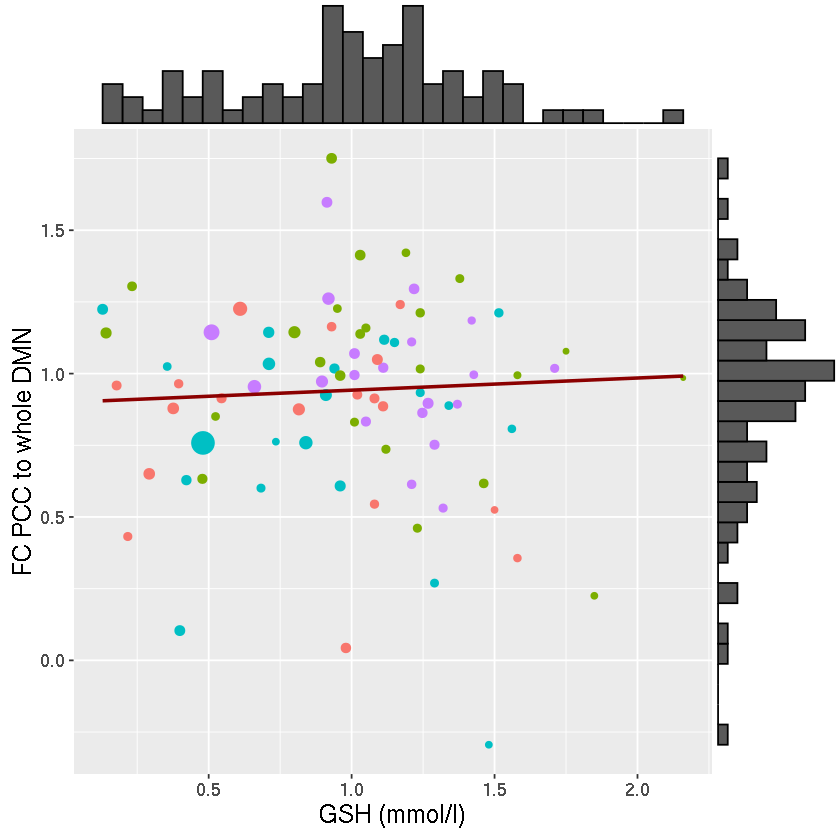

In [100]:
gsh_vs_dmn<- ggplot(data_qc, aes(x=GSH, y=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm*10)) +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  #geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE)

gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

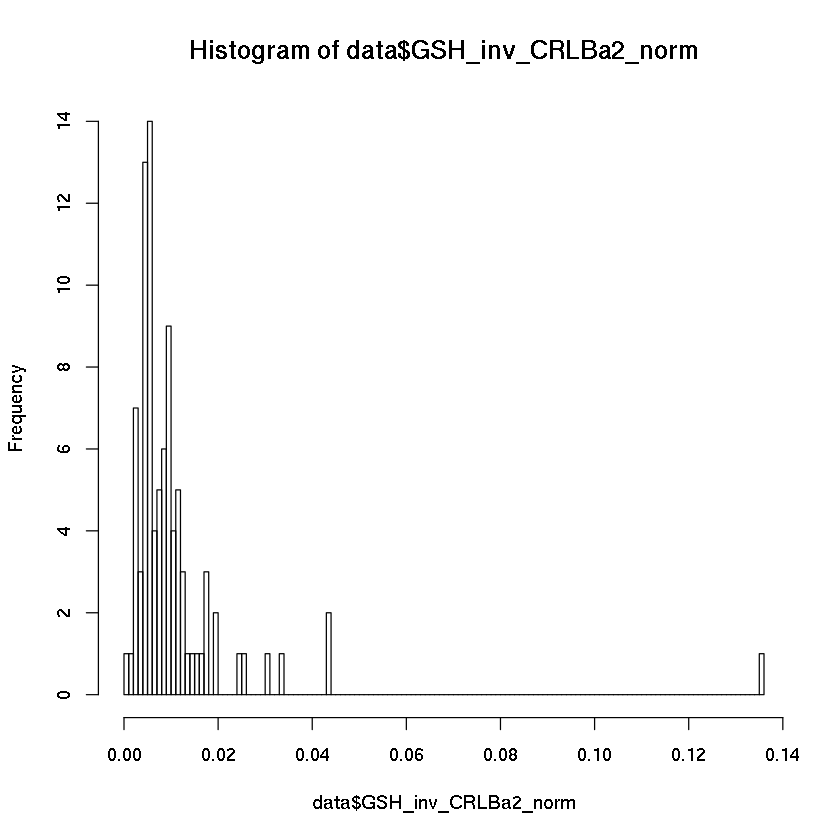

In [101]:
hist(data$GSH_inv_CRLBa2_norm, breaks=100)

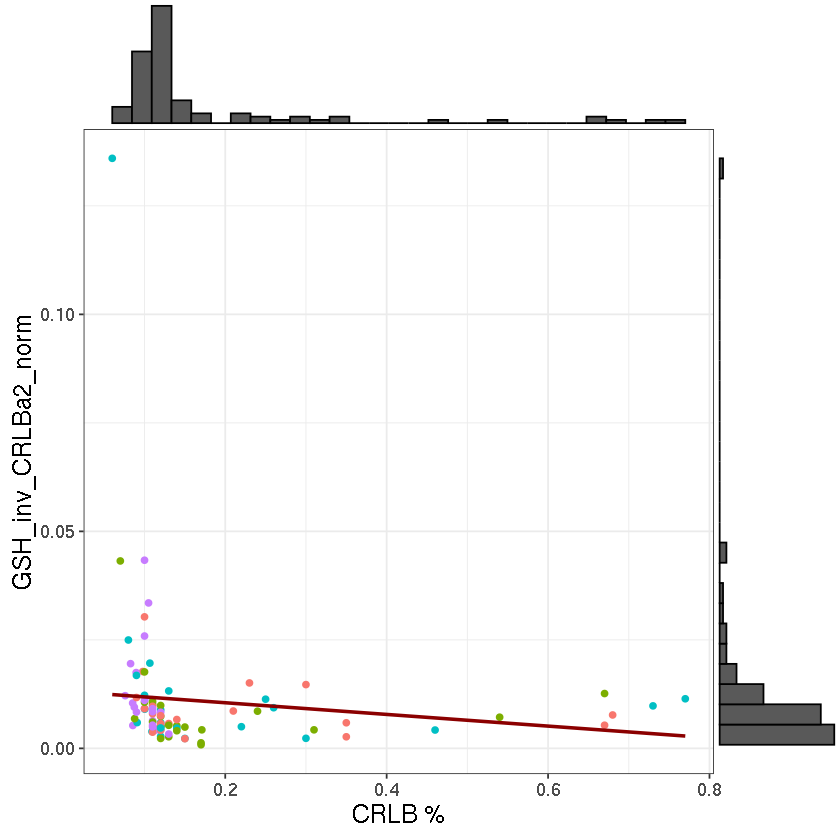

In [102]:
gsh_vs_dmn<- ggplot(data_gsh, aes(x=GSH_CRLBp, y=GSH_inv_CRLBa2_norm)) + 
  geom_point(aes(color = diagnosis)) +
  theme_bw()+
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('Weights') +
  xlab('CRLB %') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  #geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE)

gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

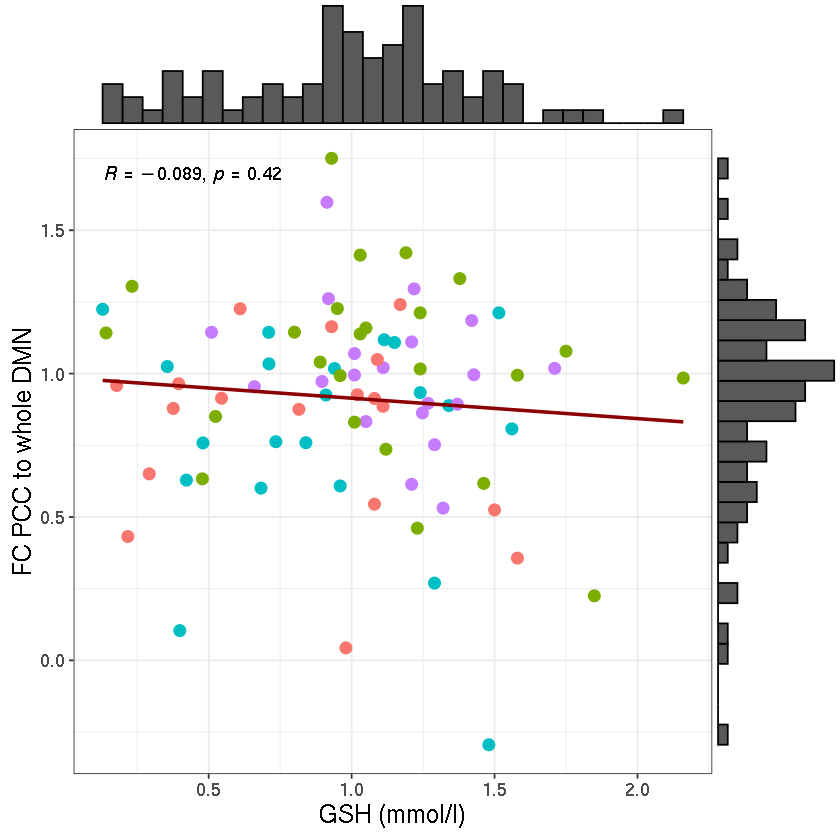

In [103]:
gsh_vs_dmn<- ggplot(data_qc, aes(x=GSH, y=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis), size=3) +
  theme_bw()+
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  #geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE)

gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

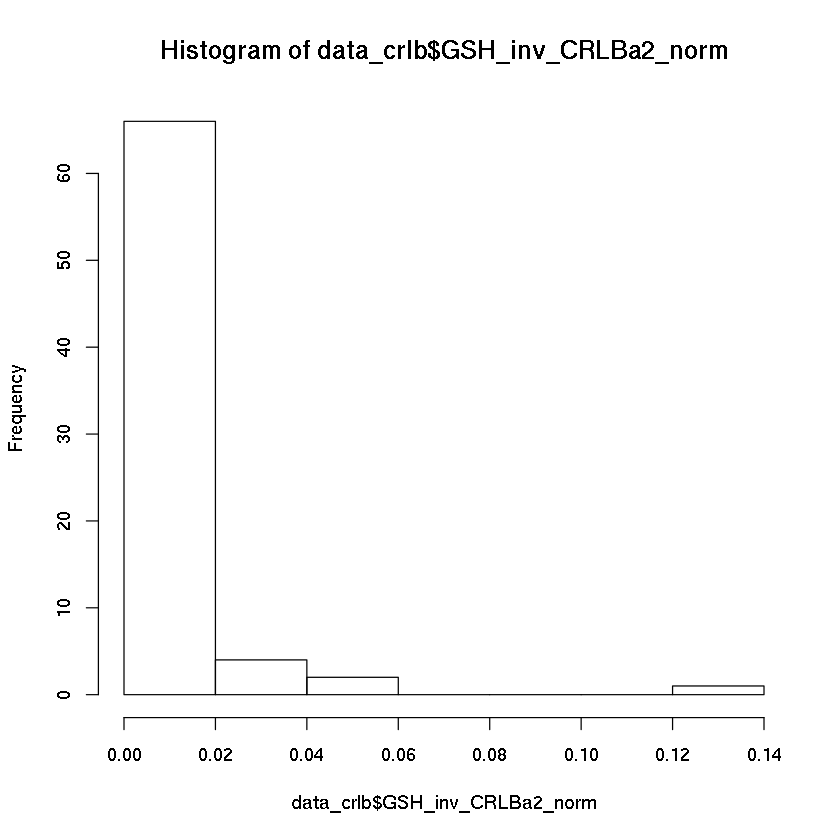

In [104]:
hist(data_crlb$GSH_inv_CRLBa2_norm)

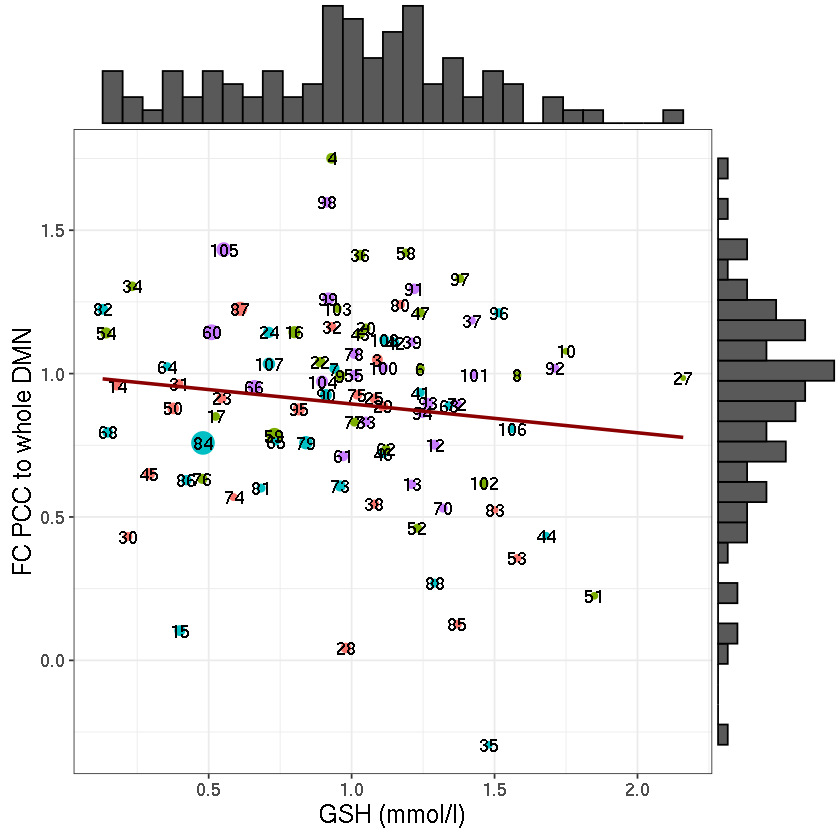

In [105]:
gsh_vs_dmn<- ggplot(data_gsh, aes(x=GSH, y=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm)) +
  theme_bw()+
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE)

gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

In [106]:
data_qc <- subset(data, QC != 'R')
dim(data_crlb)

[1] 73 34

In [107]:
data_qc['inv_CRLBp'] <- 1/data_qc['GSH_CRLBp']
data_qc['inv_CRLBp2'] <- data_qc['inv_CRLBp']^2

In [108]:
data_crlb <- subset(data_qc, GSH_CRLBp <= 0.2 & QC != 'R')
dim(data_crlb)

[1] 67 36

In [109]:
data_crlb2 <- subset(data_qc, GSH > 0.5)
dim(data_crlb2)

[1] 70 36

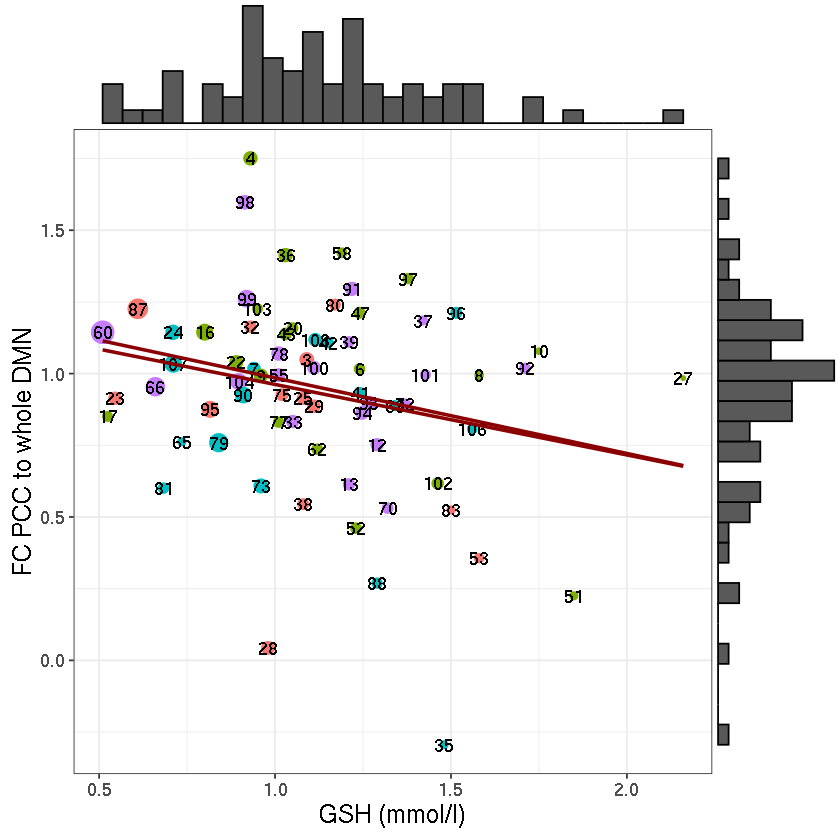

In [110]:
gsh_vs_dmn<- ggplot(data_crlb2, aes(x=GSH, y=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm)) +
  theme_bw()+
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE) +
  geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = GSH_inv_CRLBa2_norm), se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE)


gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

In [111]:
summary(lm(pcc_dmn_sph~GSH+Age, data=data_crlb2))


Call:
lm(formula = pcc_dmn_sph ~ GSH + Age, data = data_crlb2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1995 -0.1421  0.0179  0.1858  0.7799 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.766855   0.443004   3.988 0.000167 ***
GSH         -0.281253   0.126066  -2.231 0.029033 *  
Age         -0.007424   0.005566  -1.334 0.186785    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3284 on 67 degrees of freedom
Multiple R-squared:  0.07918,	Adjusted R-squared:  0.05169 
F-statistic: 2.881 on 2 and 67 DF,  p-value: 0.06307


In [112]:
summary(lm(pcc_dmn_sph~GSH+Age, weights=GSH_inv_CRLBa2_norm, data=data_crlb2))


Call:
lm(formula = pcc_dmn_sph ~ GSH + Age, data = data_crlb2, weights = GSH_inv_CRLBa2_norm)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.091502 -0.015733  0.000208  0.014081  0.078242 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.631293   0.408435   3.994 0.000164 ***
GSH         -0.295761   0.124237  -2.381 0.020135 *  
Age         -0.004991   0.005081  -0.982 0.329565    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0267 on 67 degrees of freedom
Multiple R-squared:  0.07966,	Adjusted R-squared:  0.05218 
F-statistic: 2.899 on 2 and 67 DF,  p-value: 0.06199


In [113]:
s_model <- lm(pcc_dmn_sph~GSH+Age, data=data_qc)
summary(s_model)


Call:
lm(formula = pcc_dmn_sph ~ GSH + Age, data = data_qc)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.23756 -0.14726  0.03643  0.20501  0.84160 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.543969   0.420395   3.673 0.000432 ***
GSH         -0.101709   0.091093  -1.117 0.267534    
Age         -0.007504   0.005500  -1.364 0.176243    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3362 on 80 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.03044,	Adjusted R-squared:  0.006201 
F-statistic: 1.256 on 2 and 80 DF,  p-value: 0.2904


In [121]:
t_model <- lm(pcc_dmn_sph~GSH+Age, data=data_crlb)
summary(t_model)


Call:
lm(formula = pcc_dmn_sph ~ GSH + Age, data = data_crlb)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18282 -0.12377  0.00814  0.18101  0.75886 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.713980   0.443127   3.868  0.00026 ***
GSH         -0.317343   0.132097  -2.402  0.01920 *  
Age         -0.005931   0.005651  -1.049  0.29791    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3316 on 64 degrees of freedom
Multiple R-squared:  0.08929,	Adjusted R-squared:  0.06083 
F-statistic: 3.137 on 2 and 64 DF,  p-value: 0.05013


In [119]:
t_model <- lm(Seed.to.Voxel~GSH+Age, data=data_crlb)
summary(t_model)


Call:
lm(formula = Seed.to.Voxel ~ GSH + Age, data = data_crlb)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.135110 -0.027305 -0.003146  0.031990  0.113477 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.6675807  0.0697481   9.571 5.76e-14 ***
GSH         -0.0535145  0.0207920  -2.574   0.0124 *  
Age         -0.0007368  0.0008895  -0.828   0.4106    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05219 on 64 degrees of freedom
Multiple R-squared:  0.09652,	Adjusted R-squared:  0.06829 
F-statistic: 3.419 on 2 and 64 DF,  p-value: 0.03885


In [118]:
data_gsh <- subset(data_gsh, QC != 'R')

In [ ]:
data_gsh['inv_CRLBp'] = 1/data_gsh['GSH_CRLBp']
data_gsh['inv_CRLBp2'] = data_gsh['inv_CRLBp']^2  

In [ ]:
data_gsh['inv_CRLBa'] = 1/(data_gsh['GSH_CRLBp']*data_gsh['GSH'])

In [ ]:
data_gsh_good <- subset (data_gsh, GSH_CRLBp<=0.20 & GSH >= 0.75)
dim(data_gsh_good)

In [ ]:
data_gsh_bad <- subset (data_gsh, GSH_CRLBp<=0.20 & GSH < 0.75)
dim(data_gsh_bad)

In [ ]:
data_gsh_ugly <- subset (data_gsh, GSH_CRLBp>0.20)
dim(data_gsh_ugly)

In [ ]:
good_bad <- rbind(data_gsh_good, data_gsh_bad)
good_ugly <- rbind(data_gsh_good, data_gsh_ugly)

In [ ]:
gsh_vs_dmn<- ggplot(good_ugly, aes(x=GSH, y=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm)) +
  theme_bw()+
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE)

gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

In [ ]:
#CRLB lim
summary(lm(pcc_dmn_sph~GSH+Age, weights =inv_CRLBp2, data=good_bad))

In [ ]:
summary(lm(pcc_dmn_sph~GSH+inv_CRLBa+Age,data=data_gsh))

In [ ]:
summary(lm(pcc_dmn_sph~GSH+Age, weights=inv_CRLBp2,data=good_bad))

In [ ]:
summary(lm(pcc_dmn_sph~GSH+Age, data=data_crlb2))

In [ ]:
hist(data_gsh$inv_CRLBp, breaks=100)

In [ ]:
gsh_vs_dmn<- ggplot(data_gsh, aes(x=GSH, y=GSH_CRLBa)) + 
  geom_point(aes(color = diagnosis, size=GSH_inv_CRLBa2_norm)) +
  theme_bw()+
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  #stat_cor(method = "pearson") +
theme(text = element_text(size=14))+
  geom_errorbarh(aes(xmax = GSH + GSH_CRLBa, xmin = GSH - GSH_CRLBa, height = .01))+
  geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', fullrange=TRUE, color='darkred', na.rm=TRUE)

gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

In [ ]:
data$GHS_CRLB20

In [ ]:
gsh_vs_dmn<- ggplot(data_gsh, aes(x=GSH, y=pcc_dmn_sph)) + 
  geom_point(aes(color = diagnosis, shape=CRLB20), size=3) +
  theme_bw()+
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "none") +
  xlab('GSH (mmol/l)') +
  ylab('FC PCC to whole DMN') +
  #labs(title = "GSH concentration vs FC PCC to whole DMN") +
  stat_cor(method = "pearson") +
  theme(text = element_text(size=14))+
  #geom_errorbarh(aes(xmax = GSH + GSH_CRLBa, xmin = GSH - GSH_CRLBa, height = .2))+
  #geom_text(aes(label = NeuroMET_num)) +
  geom_smooth(method="lm", formula = 'y ~ x', se=FALSE, fullrange=TRUE, color='darkred', na.rm=TRUE)

gsh_vs_dmn <- ggMarginal(gsh_vs_dmn, type = "histogram")
gsh_vs_dmn

In [ ]:
table(data_gsh$diagnosis)

In [ ]:
table(data_crlb$diagnosis)

In [ ]:
data_gsh['CRLB20'] = data_gsh['GSH_CRLBp'] <= 0.20

In [ ]:
dim(data)

In [ ]:
data_crlb2 = subset(data, QC != 'R' & GSH_CRLBp <= 0.2)

In [ ]:
dim(data_crlb2)

In [ ]:
summary(lm(pcc_dmn_sph~GSH+Age, data=data_crlb2))

In [ ]:
data_gsh['inv_GSH_CRLBp2'] = 1/(data_gsh['GSH_CRLBp']^2)

In [ ]:
summary(lm(pcc_dmn_sph~GSH+Age, weights=inv_GSH_CRLBp2, data=data_gsh))

In [ ]:
summary(lm(pcc_dmn_sph~GSH+Age, weights=inv_GSH_CRLBp2, data=subset(data_gsh, 
                                                                    (GSH > 0.5 & GSH_CRLBp <= 0.2) |(GSH < 0.5 & GSH_CRLBp > 0.2))))

In [ ]:
data_gsh['norm_GSH'] = data_gsh['GSH'] / sum(data_gsh['GSH'])

In [ ]:
data_gsh['norm_CRLBp'] = data_gsh['GSH_CRLBp'] / sum(data_gsh['GSH_CRLBp'])

In [ ]:
data_gsh['log_inv_var'] = log(1/(data_gsh['GSH']*data_gsh['GSH_CRLBp'])^2)

In [ ]:
data_gsh['inv_GSH_CRLBp2_norm'] <- data_gsh['inv_GSH_CRLBp2'] / sum(data_gsh['inv_GSH_CRLBp2'])

In [ ]:
data_gsh['log_inv_var'] = log(1/(data_gsh['GSH']*data_gsh['GSH_CRLBp'])^2)

In [ ]:
summary(lm(pcc_dmn_sph~GSH+Age, data=data_gsh))

In [ ]:
# Wich weight

In [ ]:
Estimate = lm(y ~ x)
logEstimate = lm(y ~ log(x))

plot(x,predict(Estimate),type='l',col='blue')
lines(x,predict(logEstimate),col='red')
points(x,y)

In [ ]:
x<- data['GSH']
y <- data['pcc_dmn_sph']
Estimate = lm(y ~ x)
logEstimate = lm(y ~ log(x))

plot(x,predict(Estimate),type='l',col='blue')
lines(x,predict(logEstimate),col='red')
points(x,y)

In [ ]:
# Total least squares
#https://cran.r-project.org/web/packages/tls/tls.pdf

In [ ]:
library(deming)

In [ ]:
deming(pcc_dmn_sph~GSH, data=data_gsh)

In [ ]:
se <- 1/sqrt(length(data_gsh)-3)

In [ ]:
data_gsh['ones'] =data_gsh['ones'] /40
#data_gsh['ones'] 

In [ ]:
data_gsh['se'] = se

In [ ]:
data_gsh['ones'] = rep(length(data_gsh),1)

In [ ]:
deming(pcc_dmn_sph~GSH, data=data_gsh)

In [ ]:
cov(data_gsh$pcc_dmn_sph,data_gsh$GSH)

In [ ]:
deming(pcc_dmn_sph~GSH, data=data_gsh, xstd=GSH_CRLBa, ystd=se)

In [ ]:
summary(lm(pcc_dmn_sph~GSH, data=subset(data_gsh, GSH_CRLBp < 0.2)))

In [ ]:
deming(pcc_dmn_sph~Age, data=subset(data_gsh, GSH_CRLBp < 0.2))

In [ ]:
deming(pcc_dmn_sph~GSH, data=data_gsh, xstd=GSH_CRLBa, ystd=se, cv=TRUE)

In [ ]:
se = (+0.3087598 + 0.237716)/(2*1.96)
se

In [ ]:
z =  -0.0355219/0.1394097
z

In [ ]:
2*pnorm(-abs(z))

In [ ]:
deming(pcc_dmn_sph~GSH, data=subset(data_gsh, GSH_CRLBp < 0.2), xstd=GSH_CRLBa, ystd=se)

In [ ]:
deming(pcc_dmn_sph~GSH, data=subset(data_gsh, GSH_CRLBp < 0.2), xstd=GSH_CRLBp, ystd=ones)

# GSH/tCr

In [ ]:
mrs <- read.table('/home/orco/Dokumente/Charitè/fmri/Final_neuromet_mrs_pcc_data_AF_bearb.csv', sep=',', dec=',', header=TRUE)
head(mrs)

In [ ]:
mrs <- data.frame(mrs['Volunteer'], mrs['tCr..mmol.L.'], mrs['tCr.CRLB...'])

In [ ]:
mrs

In [ ]:
colnames(mrs) <- c('NeuroMet_Nr', 'tCr_conc', 'tCr_crlb')

In [ ]:
data <- merge(data, mrs, by='NeuroMet_Nr')

In [ ]:
head(data)

In [ ]:
data['GSHtCr'] = data['GSH_All'] / data['tCr_conc']

In [ ]:
p<- ggplot(data, aes(y=GSHtCr, x=pcc2dmn_gm)) + 
  geom_point(aes(color = diag, size=inv_aCRLB_norm)) +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "bottom") +
  labs(title = "Connectivity vs GSH") #+
  #stat_smooth(method="lm", formula =  y~x , data=data, color="darkred")
#geom_smooth(method=lmm, apping = aes(weight = Asset), se=FALSE, fullrange=TRUE, color='darkblue') +
  #stat_smooth(method="lm", formula =  y~x , data=data, aes(weight=inv_aCRLB2_norm), color="darkred")
ggMarginal(p, type = "boxplot")

In [ ]:
cor.test(data$pcc2dmn_gm, data$GSHtCr, method="pearson")

In [ ]:
#options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 2000, repr.plot.quality=600)
p <- ggplot(data %>% mutate(diag=factor(diag, levels=diag_order)), aes(y=VLMT_Dg7, x=GSHtCr)) + 
  geom_point(aes(color = diag), size=3) +
  scale_shape_manual(values = c(16, 17, 18)) + 
    xlab('[GSH]') +
    ylab('VLMT_Dg7 score') +
    labs(color='Diagnosis') +
theme_bw() +
theme(legend.position = "bottom") +
labs(title = "GSH concentrations vs VLMT_Dg7 score") +
theme(text = element_text(size=12)) +
geom_smooth(method="lm", formula = 'y ~ x', mapping = aes(weight = inv_aCRLB_norm), se=FALSE, fullrange=TRUE, color='darkblue')
  #stat_smooth(method="lm", formula =  y~x , data=data, aes(weight=inv_aCRLB_norm), color="darkred")
p<- ggMarginal(p, type = "histogram")
p

In [ ]:
ggplot(data, aes(x=diag, y=GSHtCr)) +
    geom_boxplot(alpha = 0.2, width = 0.3, aes(fill=factor(diag))) +
    xlab('Diagnosis') +
    ylab('GSH') +
    theme(strip.text.x = element_text(size=9, color="black", face="bold")) +
    stat_compare_means(method = "anova") +
#guides(color=guide_legend("Diagnosis")) +
    geom_jitter(position=position_jitter(width=0.1), aes(colour=factor(diag)), alpha=1) #+
    #geom_text(aes(label=NeuroMet_Nr),hjust=1, vjust=0)

In [ ]:
colnames(data)

In [ ]:
datadmn <- data[c('pcc2dmn_gm', 'pcc2c1_gm', 'pcc2c2_gm', 'pcc2c3_gm')]

In [ ]:
datadmn['savg'] <- rowMeans(datadmn[,2:4])

In [ ]:
datadmn['stddev'] <- apply(data[c('pcc2c1_gm', 'pcc2c2_gm', 'pcc2c3_gm')], 1, sd)

In [ ]:
datadmn['conn_w'] <- 1/datadmn['stddev']^2

In [ ]:
datadmn['conn_w_norm'] <- datadmn['conn_w'] / sum(datadmn['conn_w'])

In [ ]:
library(dwlm)

In [ ]:
ys <- sapply(data['GSH_All'], as.numeric)
xs <- sapply(data['pcc2dmn_gm'], as.numeric)
wxs <- sapply(datadmn['conn_w_norm'], as.numeric)
wys <- sapply(data['inv_aCRLB2_norm'], as.numeric)
double_weight_lm <- dwlm(y=ys, x=xs, weights.x=wxs, weights.y=wys, method='SSE')

In [ ]:
summary(double_weight_lm)

In [ ]:
summary(double_weight_lm$residuals)

In [ ]:
double_weight_lm$coefficients

In [ ]:
data['mul_w'] <- datadmn['conn_w_norm'] * data['inv_aCRLB2_norm']
data['mul_w_norm'] <- data['mul_w'] / sum(data['mul_w'])

In [ ]:
ggplot(data, aes(y=GSH_All, x=pcc2dmn_gm)) + 
  geom_point(aes(color = diag, size = mul_w_norm)) +
  scale_shape_manual(values = c(16, 17, 18)) + 
  theme(legend.position = "bottom") +
  labs(title = "conn vs GSH_All - All") #+
#geom_smooth(method=lmm, apping = aes(weight = Asset), se=FALSE, fullrange=TRUE, color='darkblue') +
  #stat_smooth(method="lm", formula =  y~x , data=covs, aes(weight=mul_w), color="darkred")

In [ ]:
# Make a column diag with the Group in acronims
diag = covs$Diagnosis
diag <- replace(diag, diag == -1, 'MCI')
diag <- replace(diag, diag == 0, 'HC')
diag <- replace(diag, diag == 1, 'AD')
pa_df <- data.frame(pa)
colnames(pa) <- c('MPFC', 'RIPL', 'LIPL')

In [ ]:
head(covs)

In [ ]:
# Make a column diag with the Group in acronims
diag = covs$Diagnosis
diag <- replace(diag, diag == -1, 'MCI')
diag <- replace(diag, diag == 0, 'HC')
diag <- replace(diag, diag == 1, 'AD')
pa_df <- data.frame(pa)
colnames(pa) <- c('MPFC', 'RIPL', 'LIPL')